In [1]:
pip install omadb  pandas seaborn numpy scipy pyham SPARQLWrapper networkx

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Obtain a list of genes from uniprot.

import json
import requests

def unirequest_tab(GOterm):
    url = 'http://rest.uniprot.org/uniprotkb/stream?'
    params = [
    'query=(organism_id:9606)%20AND%20(go:{})'.format(GOterm),
    'fields=id,gene_names,protein_name,reviewed,protein_name,organism_name,xref_bgee',
    'format=tsv',
    ]
    params = ''.join([ p+'&' for p in params ])[:-1]
    print(url+params)
    data = requests.get(url+params).text
    
    return data
#here we pull in our proteins of interest for each biological process
terms = ['0030509' ,'0031929']
pathways = ['BMP', 'TOR']
datasets = { t:unirequest_tab(t) for t in terms}



http://rest.uniprot.org/uniprotkb/stream?query=(organism_id:9606)%20AND%20(go:0030509)&fields=id,gene_names,protein_name,reviewed,protein_name,organism_name,xref_bgee&format=tsv
http://rest.uniprot.org/uniprotkb/stream?query=(organism_id:9606)%20AND%20(go:0031929)&fields=id,gene_names,protein_name,reviewed,protein_name,organism_name,xref_bgee&format=tsv


In [3]:
import pandas as pd
import numpy as np
from io import StringIO

#Load queries into some dataframes

queries =[]
for i,term in enumerate(datasets):
    df = pd.read_table(StringIO(datasets[term]))
    print(df.head())
    df['pathway'] = pathways[i]
    df['protein_name'] = df['Protein names'].map( lambda x : x.split(',')[0])

    df = df[df.Reviewed != 'unreviewed']
    df['short_name'] = df['Gene Names'].map( lambda x : x.split(' ')[0])
    #let's subsample to a few entries for the sake of brevity 
    df = df.sample(n = 20)
    print(df.head())
    queries.append(df)
    

#Total starting dataset
queries = pd.concat(queries)
#in this line we iterate through the dataframe to generate a dictionary of names we will use to identify our proteins at each step of our analysis.
names= { query['Entry Name']:query['short_name'] + ' '+query.pathway for index,query in queries[['Entry Name','short_name','pathway']].iterrows() if query['short_name'] is not np.nan }

         Entry Name       Gene Names  \
0  A0A024R274_HUMAN  SMAD4 hCG_23686   
1  A0A024R8E2_HUMAN   ABL1 hCG_28416   
2  A0A0S2Z310_HUMAN           ACVRL1   
3  A0A140VJU3_HUMAN              NaN   
4  A0A384N611_HUMAN              NaN   

                                       Protein names    Reviewed  \
0  Mothers against decapentaplegic homolog, MAD h...  unreviewed   
1               Tyrosine-protein kinase, EC 2.7.10.2  unreviewed   
2  Serine/threonine-protein kinase receptor, EC 2...  unreviewed   
3                   Testicular tissue protein Li 170  unreviewed   
4                                        Protein Wnt  unreviewed   

                                     Protein names.1              Organism  \
0  Mothers against decapentaplegic homolog, MAD h...  Homo sapiens (Human)   
1               Tyrosine-protein kinase, EC 2.7.10.2  Homo sapiens (Human)   
2  Serine/threonine-protein kinase receptor, EC 2...  Homo sapiens (Human)   
3                   Testicular tissue 

In [4]:
queries

Entry Name                      Gene Names  \
27   ZEP1_HUMAN                    HIVEP1 ZNF40   
57  RUNX2_HUMAN    RUNX2 AML3 CBFA1 OSF2 PEBP2A   
68   RGMB_HUMAN                            RGMB   
21   ABL1_HUMAN                   ABL1 ABL JTK7   
25   BMP4_HUMAN                 BMP4 BMP2B DVR4   
39   MSX2_HUMAN                       MSX2 HOX8   
47  TGFB2_HUMAN                           TGFB2   
33   BMP5_HUMAN                            BMP5   
96   GDF2_HUMAN                       GDF2 BMP9   
98   ETV2_HUMAN               ETV2 ER71 ETSRP71   
93  TM100_HUMAN                         TMEM100   
58  FKBP8_HUMAN                    FKBP8 FKBP38   
82   RGMA_HUMAN                        RGMA RGM   
17   DLX3_HUMAN                            DLX3   
66   HES5_HUMAN                    HES5 BHLHB38   
28   EGLN_HUMAN                         ENG END   
89  TWSG1_HUMAN              TWSG1 TSG PSEC0250   
60  SMAD2_HUMAN               SMAD2 MADH2 MADR2   
30   BMP7_HUMAN                        BMP7 OP1   
44   GDF5_HUMAN                GDF5 BMP14 CDMP1   
17  CL16A_HUMAN                CLEC16A KIAA0350   
21  MEAK7_HUMAN            MEAK7 KIAA1609 TLDC1   
24  RPTOR_HUMAN           RPTOR KIAA1303 RAPTOR   
38  LTOR2_HUMAN  LAMTOR2 MAPBPIP ROBLD3 HSPC003   
5   GATA3_HUMAN                           GATA3   
31   SIN1_HUMAN               MAPKAP1 MIP1 SIN1   
2   LTOR5_HUMAN               LAMTOR5 HBXIP XIP   
26  MFSD8_HUMAN                      MFSD8 CLN7   
6    AKT1_HUMAN                    AKT1 PKB RAC   
32   LST8_HUMAN                  MLST8 GBL LST8   
30   SMG1_HUMAN           SMG1 ATX KIAA0421 LIP   
12  NPRL3_HUMAN      NPRL3 C16orf35 CGTHBA MARE   
15  4EBP2_HUMAN                        EIF4EBP2   
9     RS6_HUMAN                 RPS6 OK/SW-cl.2   
18   GRDN_HUMAN       CCDC88A APE GRDN KIAA1212   
35  DISC1_HUMAN                  DISC1 KIAA0457   
8   SESN3_HUMAN                     SESN3 SEST3   
33  CAR11_HUMAN                   CARD11 CARMA1   
22  LARP1_HUMAN             LARP1 KIAA0731 LARP   
3   TIPRL_HUMAN                           TIPRL   

                                        Protein names  Reviewed  \
27  Zinc finger protein 40 (Cirhin interaction pro...  reviewed   
57  Runt-related transcription factor 2 (Acute mye...  reviewed   
68  Repulsive guidance molecule B (DRG11-responsiv...  reviewed   
21  Tyrosine-protein kinase ABL1, EC 2.7.10.2 (Abe...  reviewed   
25  Bone morphogenetic protein 4, BMP-4 (Bone morp...  reviewed   
39    Homeobox protein MSX-2 (Homeobox protein Hox-8)  reviewed   
47  Transforming growth factor beta-2 proprotein (...  reviewed   
33                Bone morphogenetic protein 5, BMP-5  reviewed   
96  Growth/differentiation factor 2, GDF-2 (Bone m...  reviewed   
98  ETS translocation variant 2 (Ets-related prote...  reviewed   
93                          Transmembrane protein 100  reviewed   
58  Peptidyl-prolyl cis-trans isomerase FKBP8, PPI...  reviewed   
82  Repulsive guidance molecule A (RGM domain fami...  reviewed   
17                             Homeobox protein DLX-3  reviewed   
66  Transcription factor HES-5 (Class B basic heli...  reviewed   
28                        Endoglin (CD antigen CD105)  reviewed   
89             Twisted gastrulation protein homolog 1  reviewed   
60  Mothers against decapentaplegic homolog 2, MAD...  reviewed   
30  Bone morphogenetic protein 7, BMP-7 (Osteogeni...  reviewed   
44  Growth/differentiation factor 5, GDF-5 (Bone m...  reviewed   
17  Protein CLEC16A (C-type lectin domain family 1...  reviewed   
21  MTOR-associated protein MEAK7, MEAK7 (MTOR ass...  reviewed   
24  Regulatory-associated protein of mTOR, Raptor ...  reviewed   
38  Ragulator complex protein LAMTOR2 (Endosomal a...  reviewed   
5   Trans-acting T-cell-specific transcription fac...  reviewed   
31  Target of rapamycin complex 2 subunit MAPKAP1,...  reviewed   
2   Ragulator complex protein LAMTOR5 (Hepatitis B...  reviewed   
26  Major facilitator superfamily dom

In [5]:
from omadb import Client
c = Client()
omadata = {}
#retrieve oma entries for all query genes
for query in list(queries['Entry Name']) :
    try:
        omadata[query] = c.entries.__getitem__(query) 
    except:
        print('err ' +query)

#Take all queries from human and
#get orthologs in all of the species they're found in
orthologs = {}
for query in omadata:
    orthologs[query] = c.entries.orthologs(omadata[query]['omaid'])

#Create profiles from orthology data, with species codes as columns
#obtain all species codes for query genes
profiles = {}
for query in orthologs:
    profiles[query] = {}
    profiles[query]['short_name'] = names[query]
    for ortho in orthologs[query]:
        spec = ortho['omaid'][0:5]
        if spec not in profiles[query]:
            profiles[query][spec] = 1
        else:
            profiles[query][spec]+=1

#The columns of the matrix are the union of all the species represented across all orthologs
columns = set([ spec  for query in profiles for spec in profiles[query] ])
#Add in 0s where the orthologs are absent
for query in profiles:
    profiles[query].update( { spec : 0 for spec in columns if spec not in profiles[query] } )

#Create a dataframe with this dictionary

orthosdf = pd.DataFrame.from_dict( profiles , orient = 'index')
orthosdf.index = orthosdf.short_name
orthosdf = orthosdf.drop('short_name', axis = 1)


In [6]:
orthosdf.head()

CALMI  LEPOC  ANGAN  ANATE  SERDU  ECHNA  CYNSE  SCOMX  GASAC  \
short_name                                                                  
HIVEP1 BMP      1      1      1      1      1      1      1      1      1   
RUNX2 BMP       1      1      1      1      1      1      1      1      1   
RGMB BMP        1      1      2      1      1      1      2      1      1   
ABL1 BMP        1      0      1      1      1      1      1      1      1   
BMP4 BMP        1      1      1      1      1      1      1      1      1   

            SPAAU  ...  MICPC  HYPDU  IXOSC  PENDC  BLUGR  GLOTA  PHATC  \
short_name         ...                                                    
HIVEP1 BMP      1  ...      0      0      0      0      0      0      0   
RUNX2 BMP       1  ...      0      0      0      0      0      0      0   
RGMB BMP        1  ...      0      0      0      0      0      0      0   
ABL1 BMP        1  ...      0      1      0      0      0      0      0   
BMP4 BMP        1  ...      0      1      1      0      0      0      0   

            GALSU  XENBS  HELRO  
short_name                       
HIVEP1 BMP      0      0      0  
RUNX2 BMP       0      0      0  
RGMB BMP        0      0      1  
ABL1 BMP        0      0      0  
BMP4 BMP        0      0      1  

[5 rows x 634 columns]

/home/cactuskid/miniconda3/envs/f1000/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


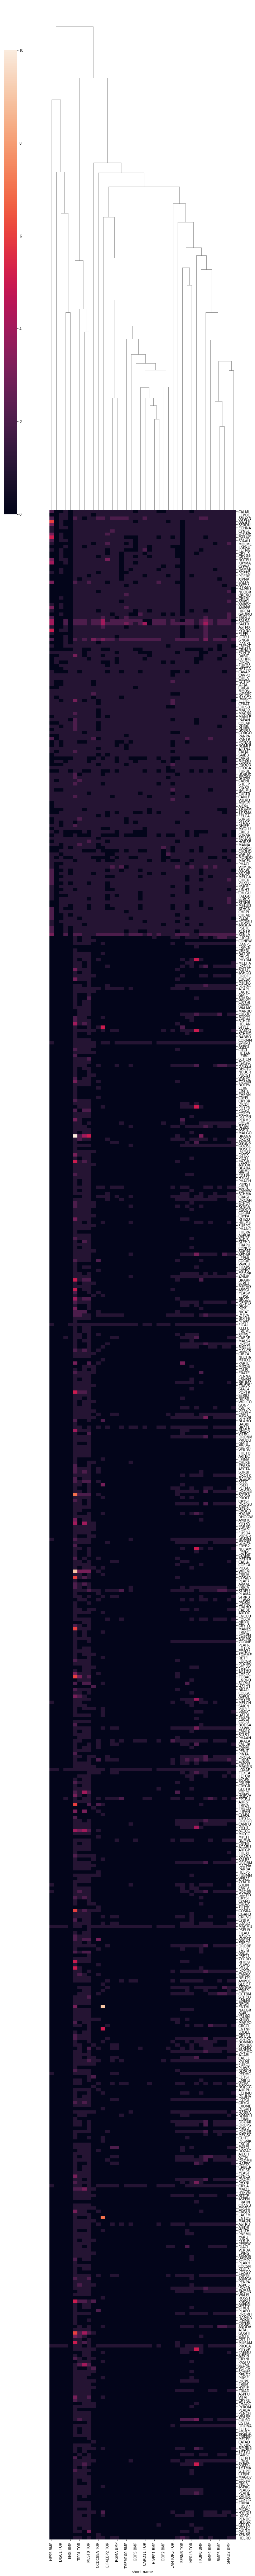

In [7]:
#Use seaborn to visualize the clustering of functional modules

import seaborn as sns
from matplotlib import pyplot as plt

#Metrics used to compare the vectors to establish a distance kernel
metrics = [ 'euclidean', 'hamming', 'jaccard' ]

#Hierarchical clustering methods
methods = [ 'average' , 'weighted' , 'centroid']

#Visualize the clustered profile matrix
sns.clustermap( orthosdf.T , metric= metrics[2] , method=methods[1] , col_cluster=True, row_cluster= False, yticklabels = orthosdf.columns , figsize = (10, 100))


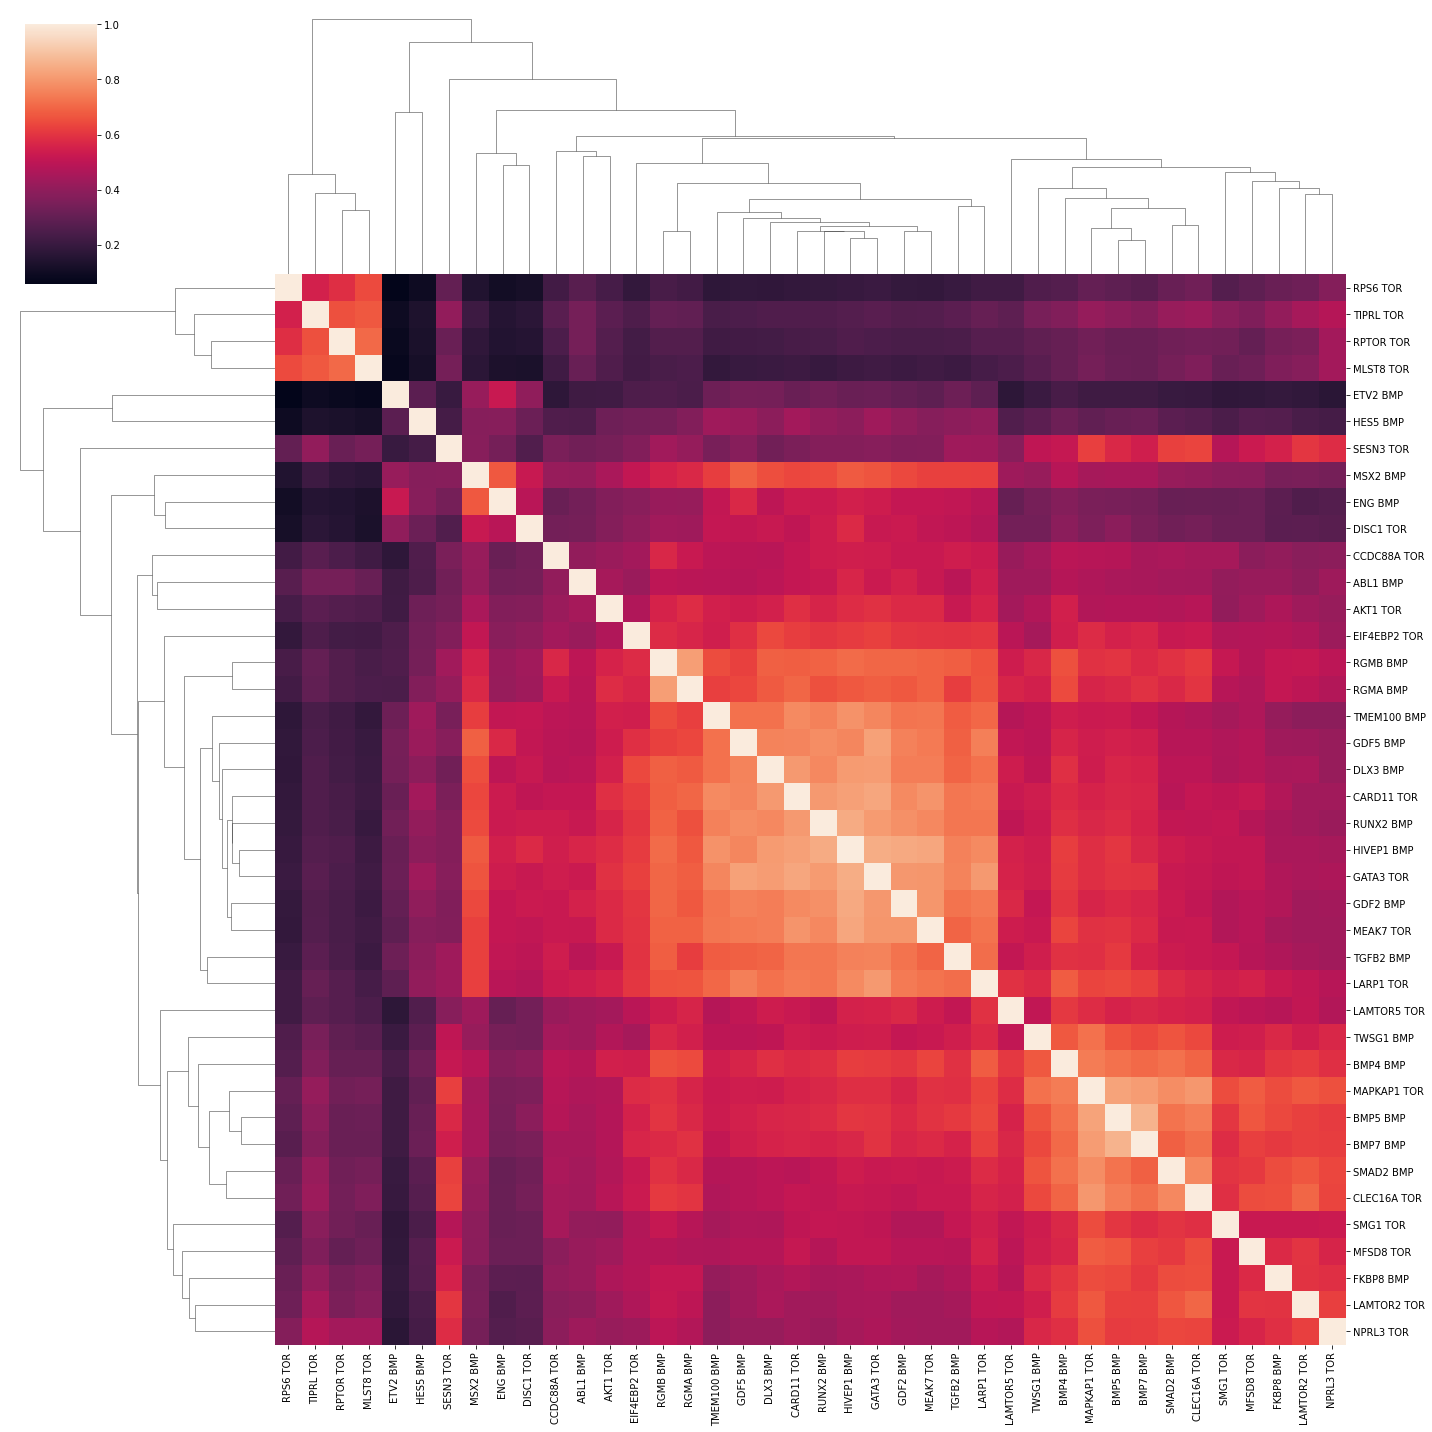

In [8]:
#here we directly establish the distance matrix between all profiles
from scipy.spatial.distance import cdist

#let's generate a distance kernel with a distance metric of our choice
distmat = cdist(orthosdf.to_numpy(), orthosdf.to_numpy() , metric = metrics[2])
sns.clustermap( 1-distmat , metric= metrics[0] , method=methods[1] , col_cluster=True, row_cluster= True, yticklabels = orthosdf.index , xticklabels = orthosdf.index , figsize = (20, 20))


In [26]:
#let's use independent analysis to comfirm 
#we need the BGee cross reference for our genes and some network data from string

qlist = { query['Entry Name']:query['Bgee'].replace(';','') for index,query in queries[['Entry Name','Bgee']].iterrows() if query['Bgee'] is not np.nan }
qlists = {'HUMAN': qlist }

# now using some cross references to other organisms
xrefs = {}
#we're going to grab the ensemble IDs for the orthologues from a few species also present in the Bgee dataset
#Bgee species are listed here https://bgee.org
#species information for OMA is available at https://omabrowser.org/All/oma-species.txt
#Ive selected some interesting species that are in both
species = [ 'DROME','CAEEL' , 'DANRE' , 'MOUSE' , 'PIGXX']

#retrieve the uniprot xrefs for each of the sequences
allnames = {}
taxmap = {'HUMAN':9606}

for q in orthologs:
    for o in orthologs[q]:
        for spec in species:
            if spec not in xrefs:
                xrefs[spec] = {}
            
            if  o['omaid'][0:5] == spec:
                if spec not in taxmap:
                    taxmap[spec] = o['species']['taxon_id']
                xrefs[spec][o['omaid'] ] = c.entries.xrefs(o['omaid'])
                if 'UniProtKB/TrEMBL' in xrefs[spec][o['omaid'] ]:
                    names[ xrefs[spec][o['omaid']]['UniProtKB/TrEMBL'][0]] = names[q]
allnames.update(names)


for spec in species:
    #map everything to Bgee/ensembl gene IDs
    qlist = {}
    tryagain = []
    for entry in xrefs[spec]:
        if 'Bgee' in xrefs[spec][entry]  and 'UniProtKB/TrEMBL' in xrefs[spec][entry]:
            try:
                qlist.update({xrefs[spec][entry]['UniProtKB/TrEMBL'][0] : xrefs[spec][entry]['Bgee'][0].split('.')[0] })
            except IndexError:
                pass
        elif 'UniProtKB/TrEMBL' in xrefs[spec][entry]:
            tryagain.append(xrefs[spec][entry]['UniProtKB/TrEMBL'][0])
    print('qlist',qlist)
    print(tryagain)
    qlists[spec] = qlist
    

qlist {'P27091': 'FBgn0024234', 'Q7K3D4': 'FBgn0034368', 'D3PFG0': 'FBgn0003865', 'Q9W494': 'FBgn0000394', 'O96660': 'FBgn0025800', 'Q9VEV4': 'FBgn0038427', 'Q9W437': 'FBgn0029840', 'Q9V8I2': 'FBgn0034350', 'Q9V719': 'FBgn0033935', 'Q9VS51': 'FBgn0035767', 'B4F5L6': 'FBgn0264691', 'X2JDZ8': 'FBgn0263968', 'B6IDY8': 'FBgn0036397', 'Q9XZ56': 'FBgn0261560', 'P29327': 'FBgn0261592', 'Q9W5W6': 'FBgn0031094'}
['A0A0B4LGG4']
qlist {'G5EDE5': 'WBGene00022154', 'Q22033': 'WBGene00011283', 'P45896': 'WBGene00004857', 'Q95UF8': 'WBGene00001660', 'Q9N2U6': 'WBGene00022402', 'Q19845': 'WBGene00017861', 'Q9N3G2': 'WBGene00021814', 'P91040': 'WBGene00015697', 'X5LXA9': 'WBGene00018072', 'Q9NEN6': 'WBGene00004475', 'Q9N4D6': 'WBGene00022279', 'P34274': 'WBGene00022803'}
[]
qlist {'Q6U1J3': 'ENSDARG00000040261', 'Q6IYD1': 'ENSDARG00000079323', 'F8W5Q8': 'ENSDARG00000035187', 'O57574': 'ENSDARG00000019995', 'A0A0J9YJ71': 'ENSDARG00000104651', 'Q7SZV4': 'ENSDARG00000027087', 'F1QWZ4': 'ENSDARG00000059173

In [27]:
#Retrieving tissue specific expression for each of our genes using
#a sparql query for using lists of ensemble IDs on BGEE
from SPARQLWrapper import SPARQLWrapper , CSV
from io import StringIO

endpt = "https://bgee.org/sparql/"
sparql = SPARQLWrapper(endpt)

#here's the template sparql query we're going to be using
#we can add our gene IDs for each species

query = '''

PREFIX orth: <http://purl.org/net/orth#>
PREFIX genex: <http://purl.org/genex#>
PREFIX lscr: <http://purl.org/lscr#>
PREFIX gene: <http://purl.org/net/orth#Gene>
PREFIX obo: <http://purl.obolibrary.org/obo/>
SELECT DISTINCT ?anat ?anatName ?geneEns{{
    
    values  ?geneEns {{   {0}   }}
    ?gene genex:isExpressedIn ?anat .
    ?gene lscr:xrefEnsemblGene ?geneEns.
	?gene rdfs:label ?geneName .
	?anat rdfs:label ?anatName .
}}
'''

dfs = []
for species in qlists:
    print(qlists[species])
    #for each species in our queries
    #make a list of gene IDs
    
    pre = '<http://rdf.ebi.ac.uk/resource/ensembl/'
    suf = '>'
    ensemblelist = ''.join( [ pre + qlists[species][uniID]  + suf + ' ' for uniID in qlists[species] ] )
    #get the Bgee data
    print(ensemblelist)
    sparql.setQuery(query.format(ensemblelist))
    sparql.setReturnFormat(CSV)
    results = sparql.query().convert()
    #and make a dataframe for our returned results
    sub = pd.read_csv(StringIO(results.decode()) )
    #add which species the data came from to our dataframe columns
    sub['species'] = species
    sub['geneEns'] = sub['geneEns'].map(lambda x : x.split('/')[-1])
    
    #add the uniprot cannonical IDs into our dataframe as well
    sub['canonicalid'] = sub['geneEns'].map(dict(zip( qlists[species].values(), qlists[species].keys() )))
    #use uniprot IDs to map back to our original human gene names 
    sub['names'] =  sub['canonicalid'].map(names)
    dfs.append(sub)


#put everything into one big dataframe
expressionDF = pd.concat(dfs)


{'ZEP1_HUMAN': 'ENSG00000095951', 'RUNX2_HUMAN': 'ENSG00000124813', 'RGMB_HUMAN': 'ENSG00000174136', 'ABL1_HUMAN': 'ENSG00000097007', 'BMP4_HUMAN': 'ENSG00000125378', 'MSX2_HUMAN': 'ENSG00000120149', 'TGFB2_HUMAN': 'ENSG00000092969', 'BMP5_HUMAN': 'ENSG00000112175', 'GDF2_HUMAN': 'ENSG00000263761', 'ETV2_HUMAN': 'ENSG00000105672', 'TM100_HUMAN': 'ENSG00000166292', 'FKBP8_HUMAN': 'ENSG00000105701', 'RGMA_HUMAN': 'ENSG00000182175', 'DLX3_HUMAN': 'ENSG00000064195', 'HES5_HUMAN': 'ENSG00000197921', 'EGLN_HUMAN': 'ENSG00000106991', 'TWSG1_HUMAN': 'ENSG00000128791', 'SMAD2_HUMAN': 'ENSG00000175387', 'BMP7_HUMAN': 'ENSG00000101144', 'GDF5_HUMAN': 'ENSG00000125965', 'CL16A_HUMAN': 'ENSG00000038532', 'MEAK7_HUMAN': 'ENSG00000140950', 'RPTOR_HUMAN': 'ENSG00000141564', 'LTOR2_HUMAN': 'ENSG00000116586', 'GATA3_HUMAN': 'ENSG00000107485', 'SIN1_HUMAN': 'ENSG00000119487', 'LTOR5_HUMAN': 'ENSG00000134248', 'MFSD8_HUMAN': 'ENSG00000164073', 'AKT1_HUMAN': 'ENSG00000142208', 'LST8_HUMAN': 'ENSG0000016796

HUMAN
                                            anat             anatName  \
0      http://purl.obolibrary.org/obo/CL_0000655     secondary oocyte   
1  http://purl.obolibrary.org/obo/UBERON_0000002       uterine cervix   
2  http://purl.obolibrary.org/obo/UBERON_0000004                 nose   
3  http://purl.obolibrary.org/obo/UBERON_0000006  islet of Langerhans   
4  http://purl.obolibrary.org/obo/UBERON_0000007      pituitary gland   

           geneEns species  canonicalid        names  
0  ENSG00000134248   HUMAN  LTOR5_HUMAN  LAMTOR5 TOR  
1  ENSG00000134248   HUMAN  LTOR5_HUMAN  LAMTOR5 TOR  
2  ENSG00000134248   HUMAN  LTOR5_HUMAN  LAMTOR5 TOR  
3  ENSG00000134248   HUMAN  LTOR5_HUMAN  LAMTOR5 TOR  
4  ENSG00000134248   HUMAN  LTOR5_HUMAN  LAMTOR5 TOR  


/home/cactuskid/miniconda3/envs/f1000/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


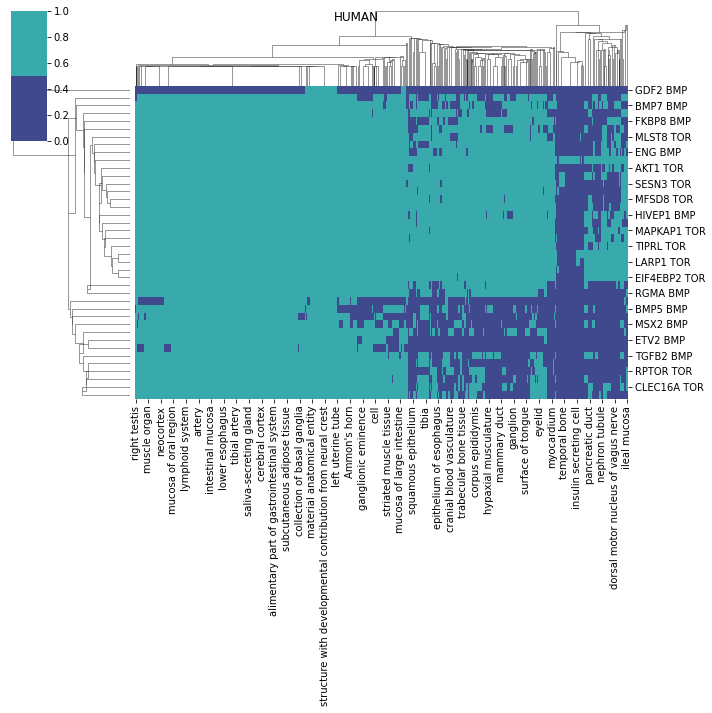

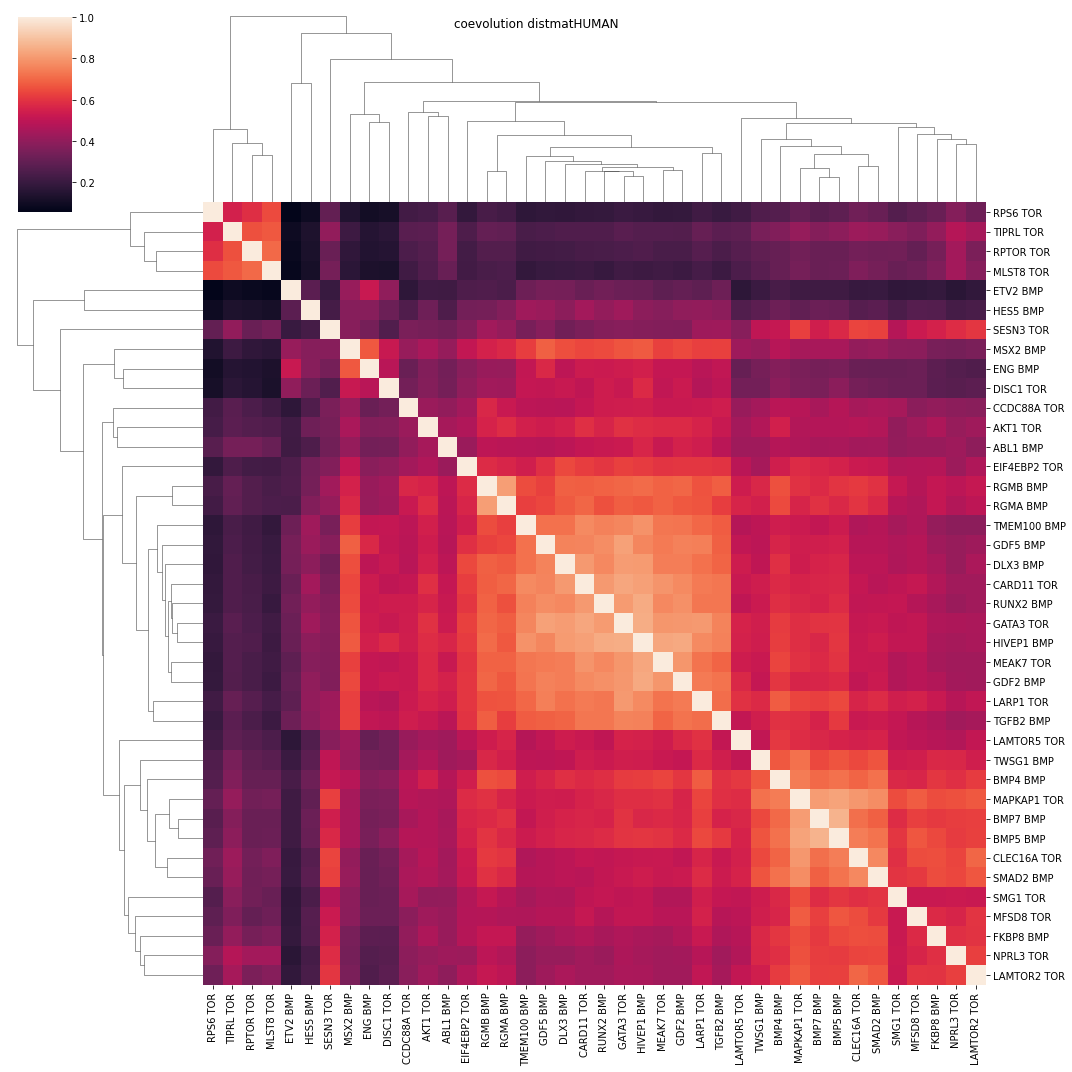

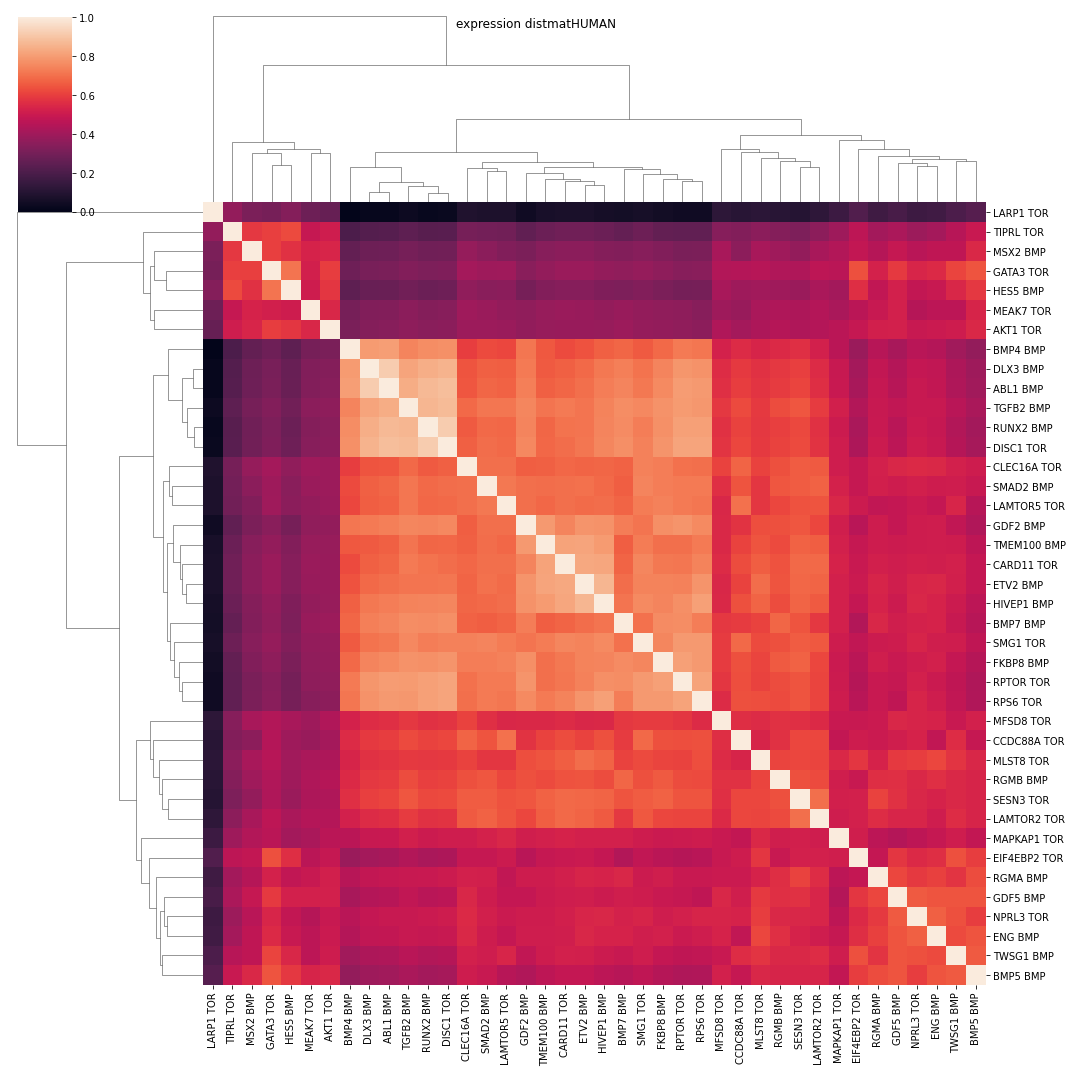

 do our matrices match from one approach to the other? 


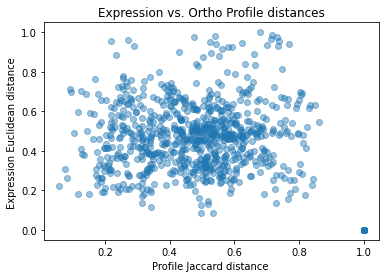

Pearson:PearsonRResult(statistic=0.1268552131566706, pvalue=3.5651533818280866e-07)
DROME
                                            anat          anatName  \
0      http://purl.obolibrary.org/obo/CL_0000655  secondary oocyte   
1  http://purl.obolibrary.org/obo/UBERON_0000033              head   
2  http://purl.obolibrary.org/obo/UBERON_0000323       late embryo   
3  http://purl.obolibrary.org/obo/UBERON_0000473            testis   
4  http://purl.obolibrary.org/obo/UBERON_0000922            embryo   

       geneEns species canonicalid      names  
0  FBgn0000394   DROME      Q9W494  TWSG1 BMP  
1  FBgn0000394   DROME      Q9W494  TWSG1 BMP  
2  FBgn0000394   DROME      Q9W494  TWSG1 BMP  
3  FBgn0000394   DROME      Q9W494  TWSG1 BMP  
4  FBgn0000394   DROME      Q9W494  TWSG1 BMP  


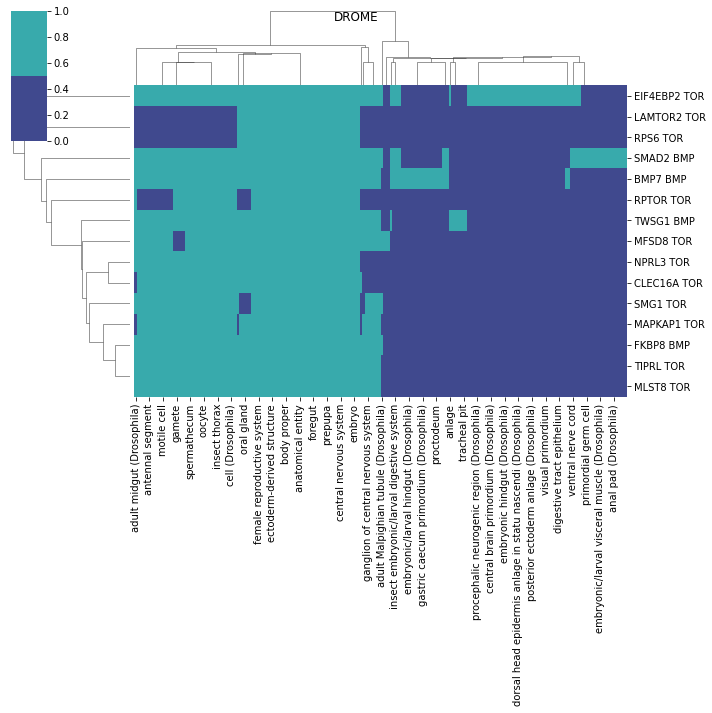

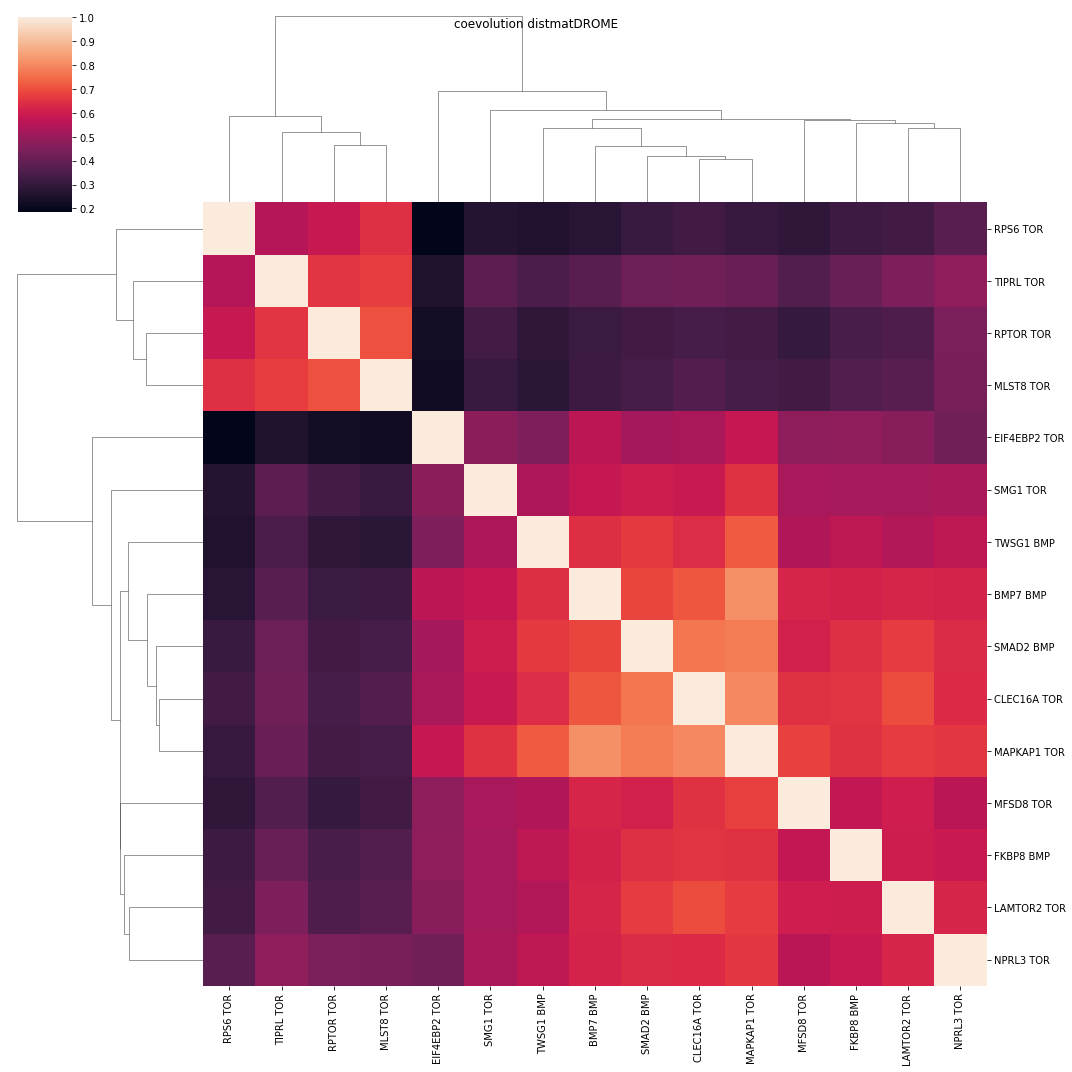

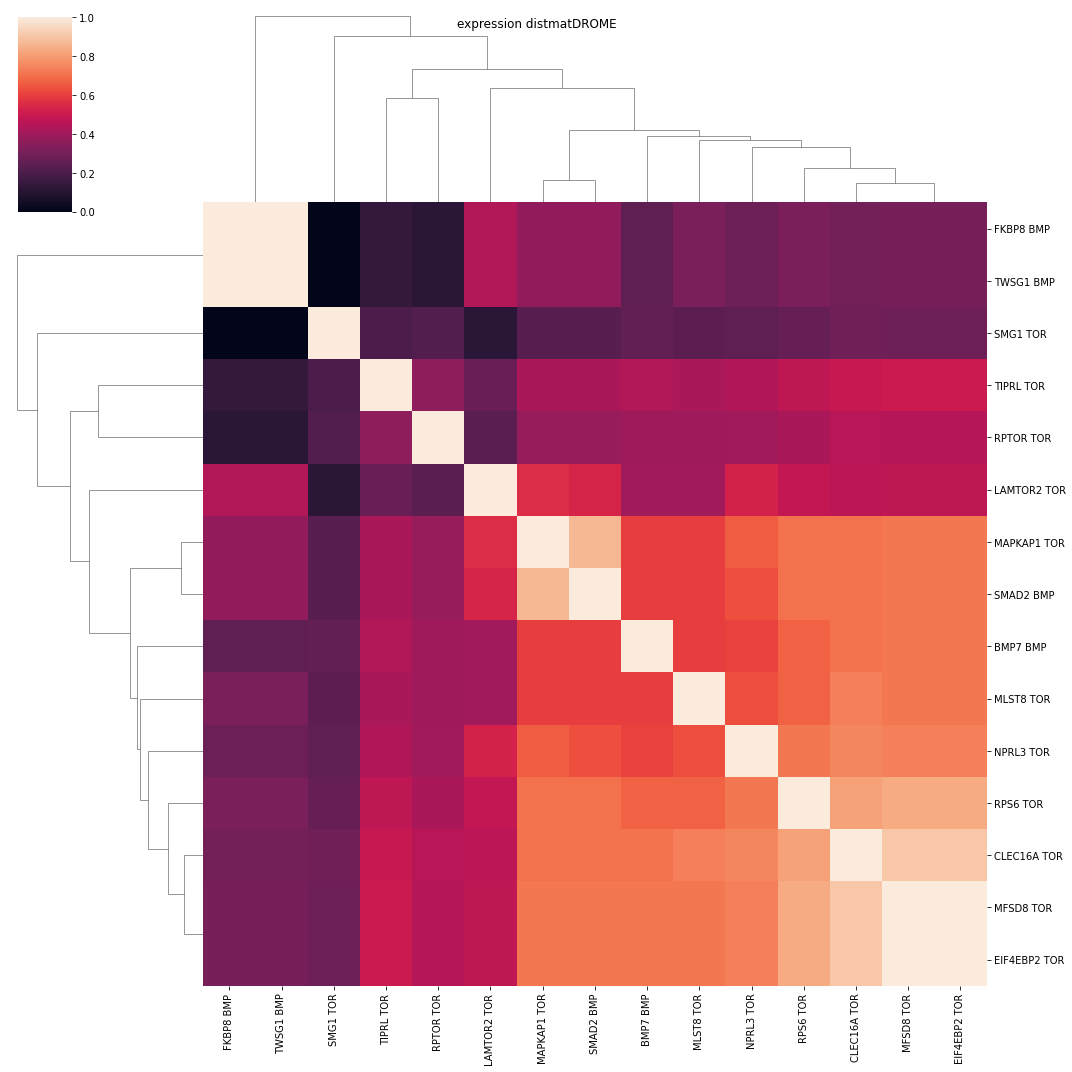

 do our matrices match from one approach to the other? 


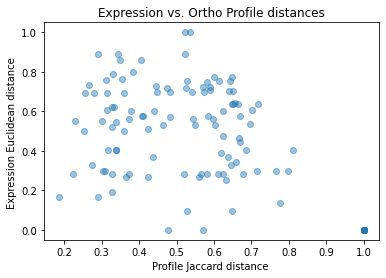

Pearson:PearsonRResult(statistic=0.4003054697503192, pvalue=4.553710047425121e-10)
CAEEL
                                            anat anatName         geneEns  \
0  http://purl.obolibrary.org/obo/UBERON_0000922   embryo  WBGene00001660   
1  http://purl.obolibrary.org/obo/UBERON_0000922   embryo  WBGene00004475   
2  http://purl.obolibrary.org/obo/UBERON_0000922   embryo  WBGene00004857   
3  http://purl.obolibrary.org/obo/UBERON_0000922   embryo  WBGene00011283   
4  http://purl.obolibrary.org/obo/UBERON_0000922   embryo  WBGene00015697   

  species canonicalid        names  
0   CAEEL      Q95UF8  CLEC16A TOR  
1   CAEEL      Q9NEN6     RPS6 TOR  
2   CAEEL      P45896    SMAD2 BMP  
3   CAEEL      Q22033     ABL1 BMP  
4   CAEEL      P91040    MLST8 TOR  


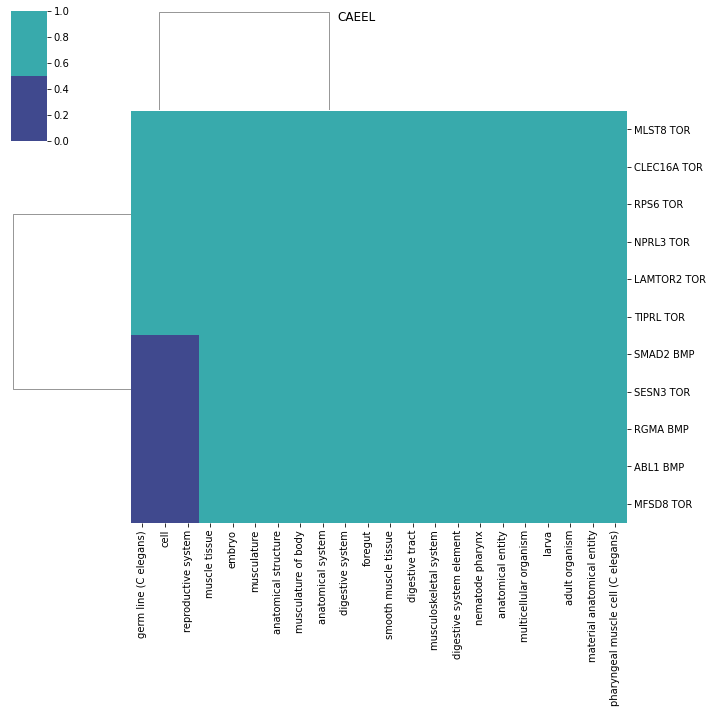

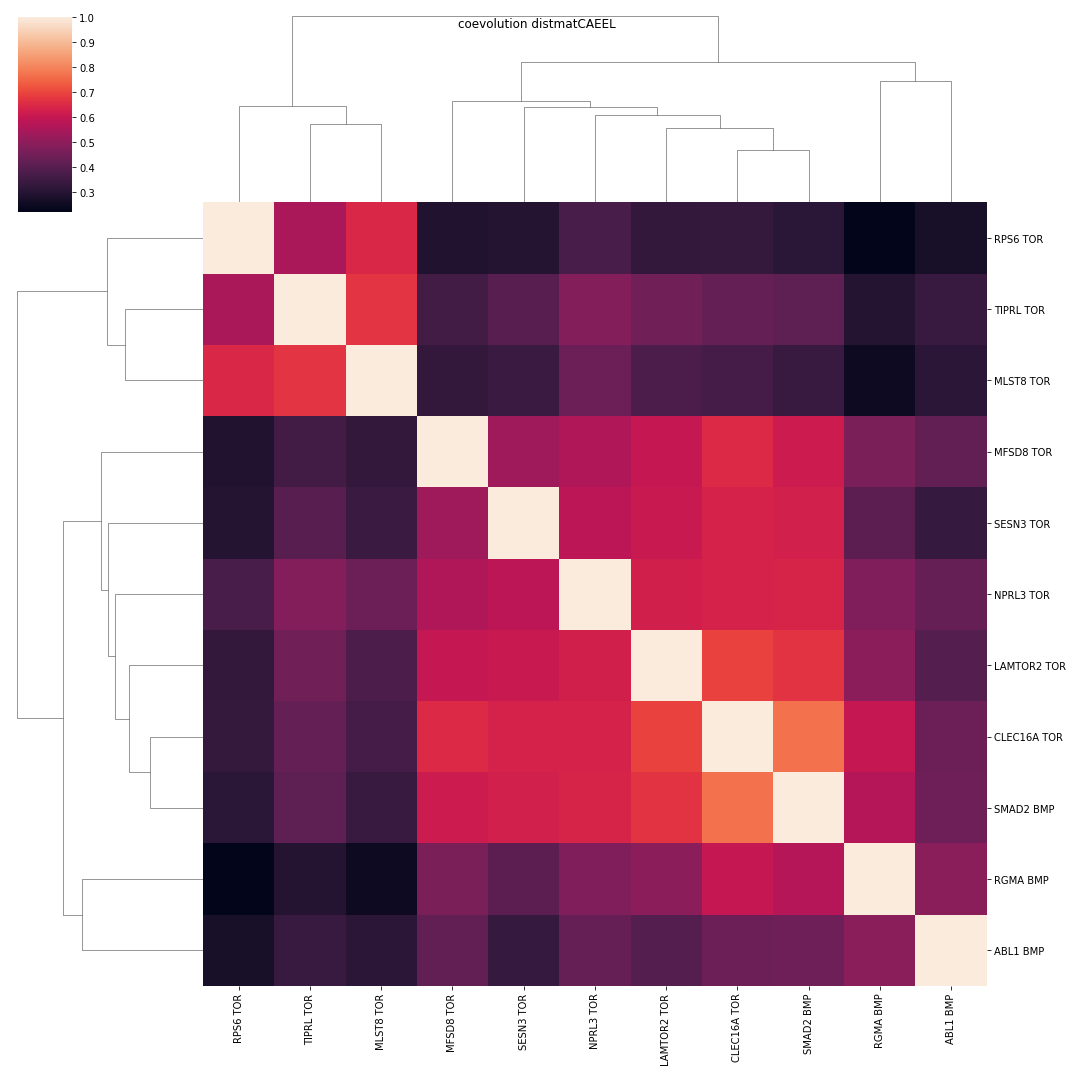

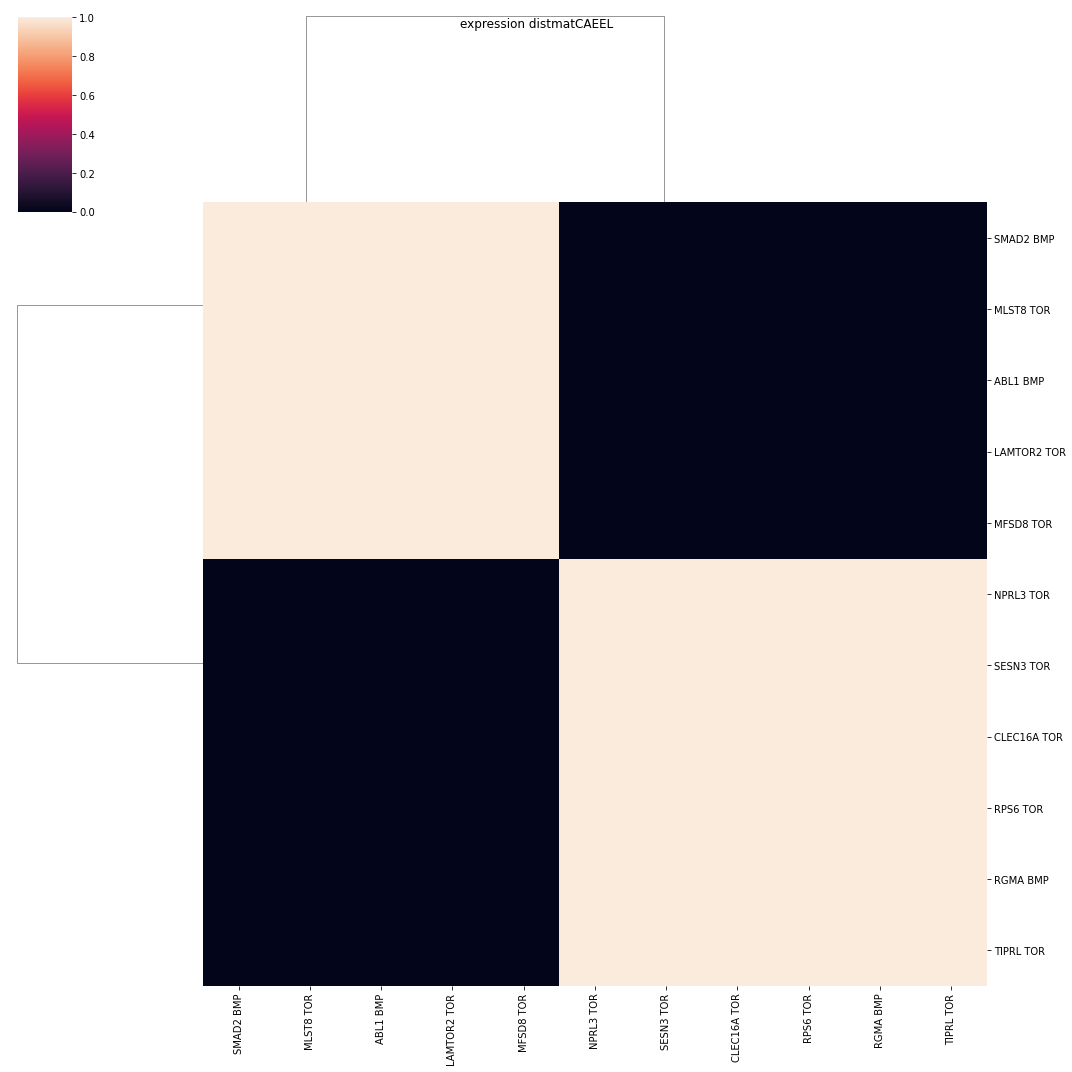

 do our matrices match from one approach to the other? 


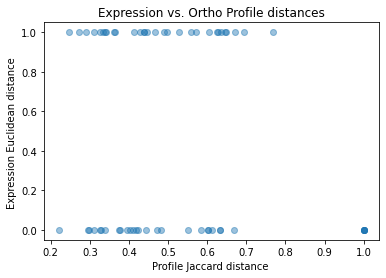

Pearson:PearsonRResult(statistic=0.16951170685926809, pvalue=0.06306268185968403)
DANRE
                                            anat         anatName  \
0  http://purl.obolibrary.org/obo/UBERON_0000014     zone of skin   
1  http://purl.obolibrary.org/obo/UBERON_0000019  camera-type eye   
2  http://purl.obolibrary.org/obo/UBERON_0000033             head   
3  http://purl.obolibrary.org/obo/UBERON_0000033             head   
4  http://purl.obolibrary.org/obo/UBERON_0000127   facial nucleus   

              geneEns species canonicalid      names  
0  ENSDARG00000016526   DANRE      B3DGG5  GATA3 TOR  
1  ENSDARG00000016526   DANRE      B3DGG5  GATA3 TOR  
2  ENSDARG00000002760   DANRE      F1QK08   GDF5 BMP  
3  ENSDARG00000016526   DANRE      B3DGG5  GATA3 TOR  
4  ENSDARG00000016526   DANRE      B3DGG5  GATA3 TOR  


/home/cactuskid/miniconda3/envs/f1000/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


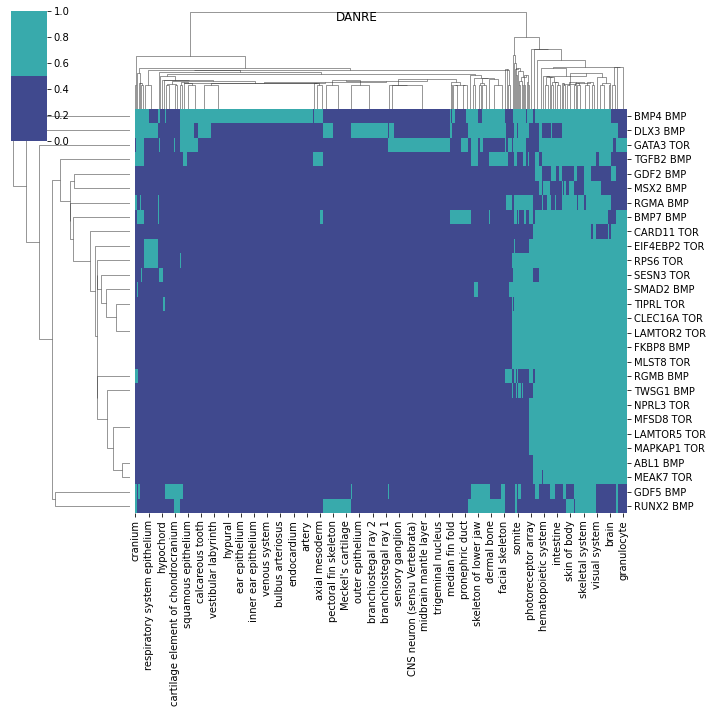

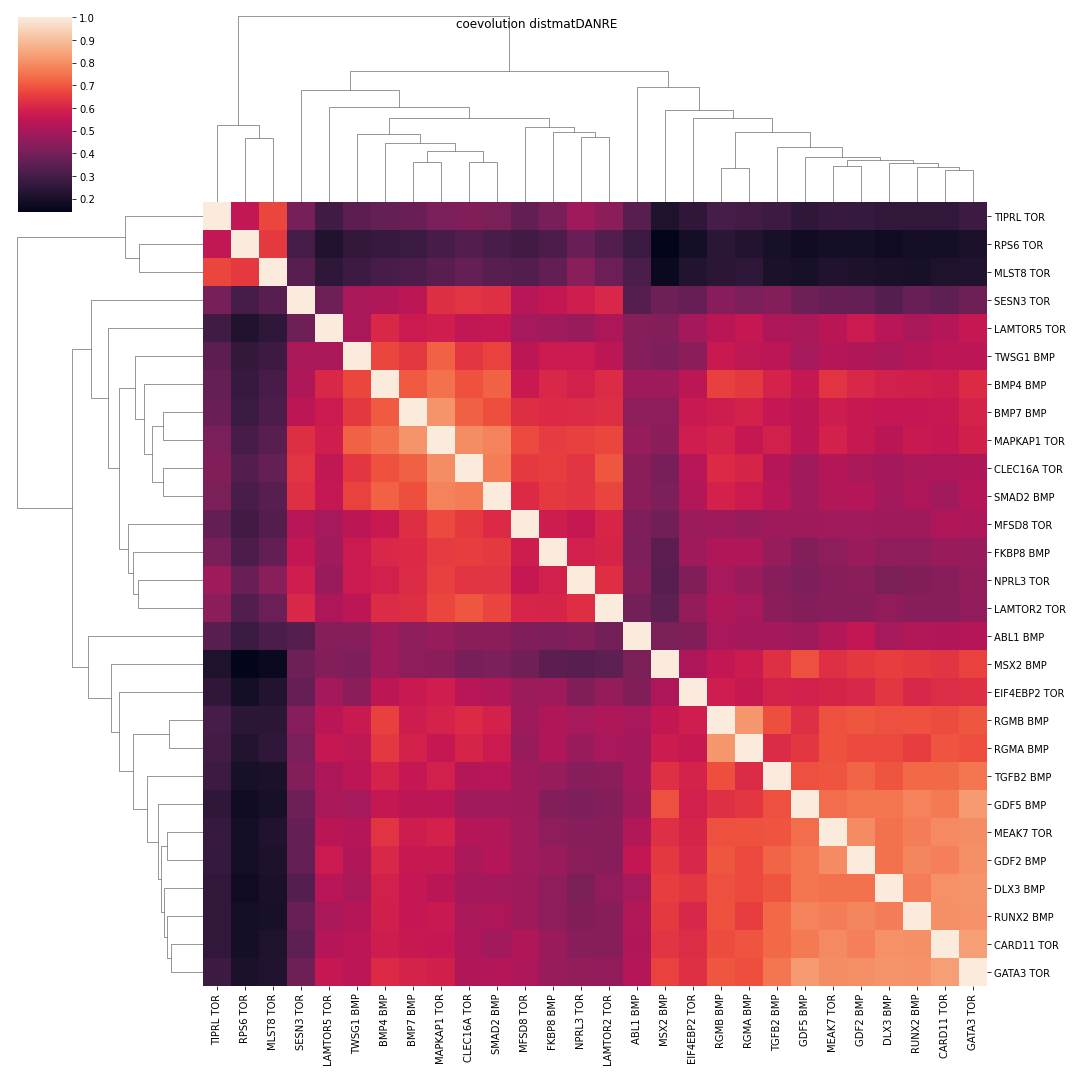

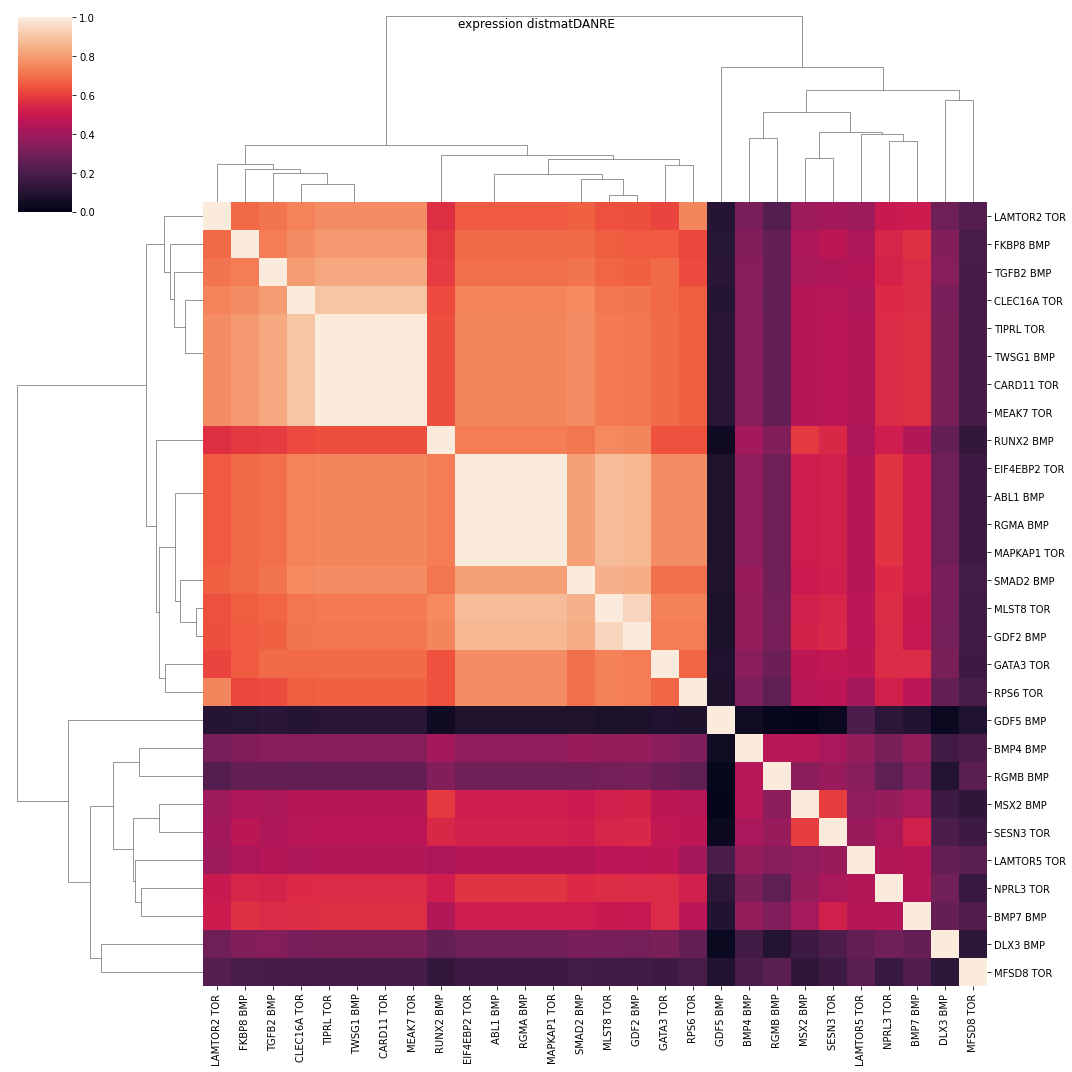

 do our matrices match from one approach to the other? 


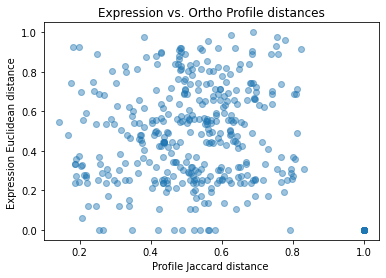

Pearson:PearsonRResult(statistic=0.09572107147672856, pvalue=0.007316718559063596)
MOUSE
                                        anat          anatName  \
0  http://purl.obolibrary.org/obo/CL_0000365     animal zygote   
1  http://purl.obolibrary.org/obo/CL_0000510       paneth cell   
2  http://purl.obolibrary.org/obo/CL_0000654    primary oocyte   
3  http://purl.obolibrary.org/obo/CL_0000655  secondary oocyte   
4  http://purl.obolibrary.org/obo/CL_0000711      cumulus cell   

              geneEns species canonicalid      names  
0  ENSMUSG00000024098   MOUSE      Q9EP52  TWSG1 BMP  
1  ENSMUSG00000024098   MOUSE      Q9EP52  TWSG1 BMP  
2  ENSMUSG00000024098   MOUSE      Q9EP52  TWSG1 BMP  
3  ENSMUSG00000024098   MOUSE      Q9EP52  TWSG1 BMP  
4  ENSMUSG00000024098   MOUSE      Q9EP52  TWSG1 BMP  


/home/cactuskid/miniconda3/envs/f1000/lib/python3.10/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


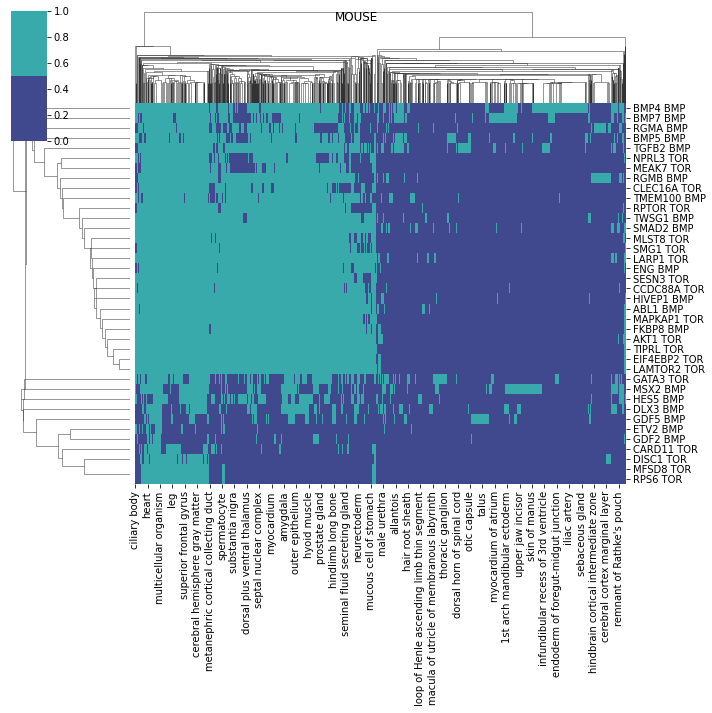

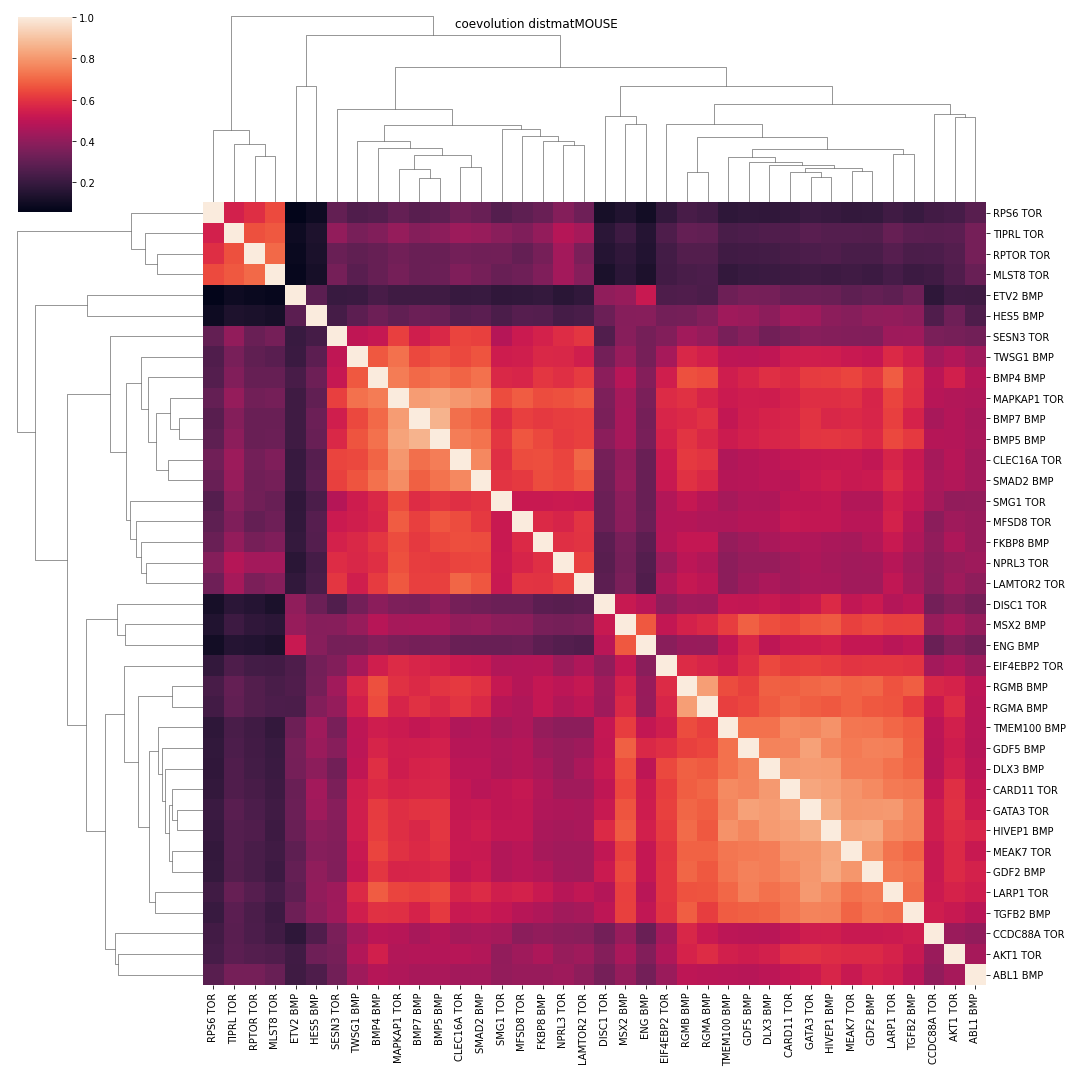

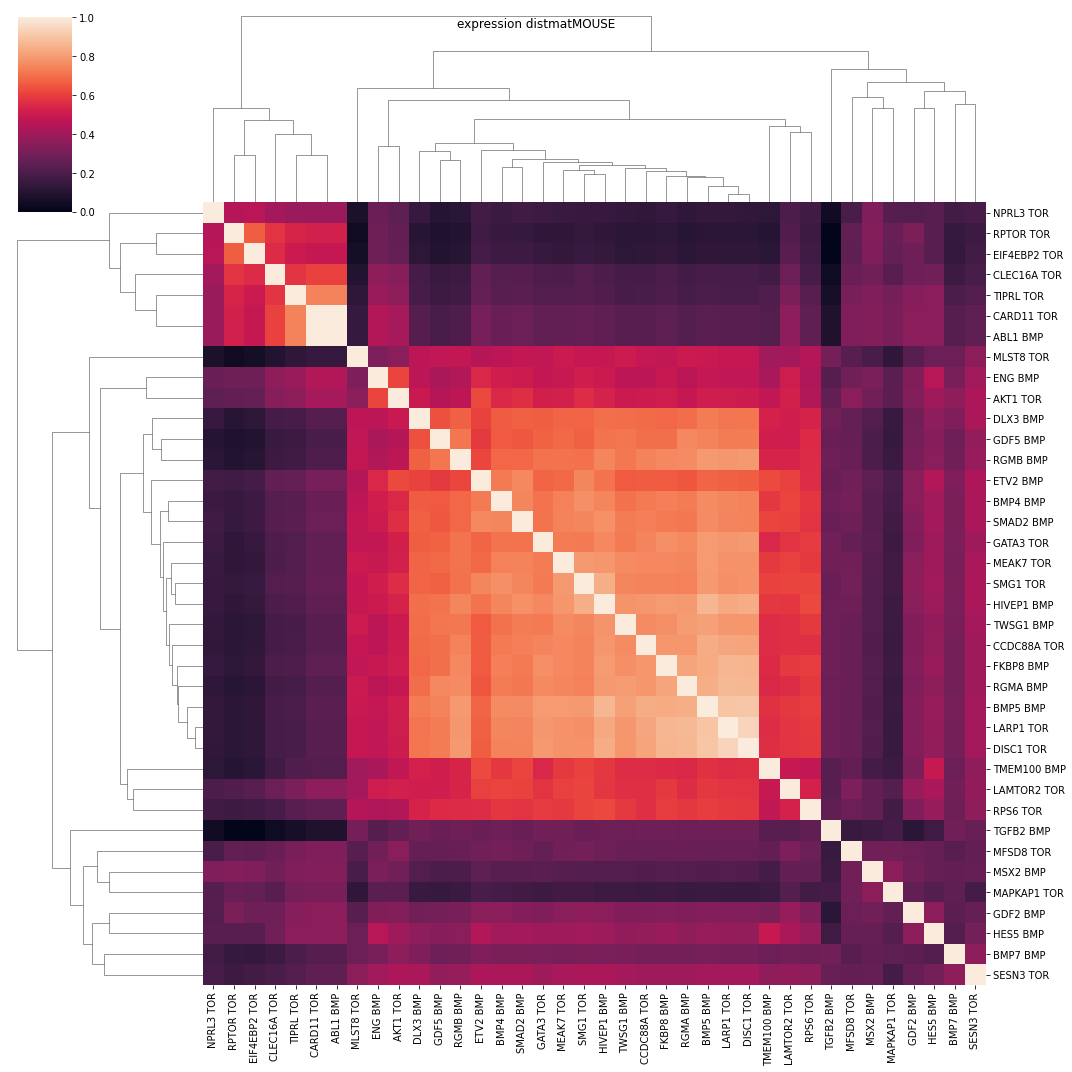

 do our matrices match from one approach to the other? 


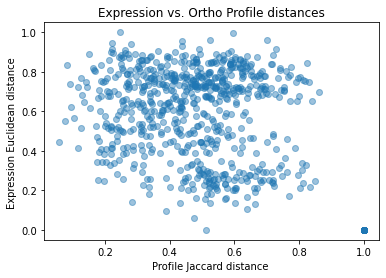

Pearson:PearsonRResult(statistic=0.2652618717021824, pvalue=1.11813064929599e-24)
PIGXX
                                            anat                anatName  \
0  http://purl.obolibrary.org/obo/UBERON_0000029              lymph node   
1  http://purl.obolibrary.org/obo/UBERON_0000059         large intestine   
2  http://purl.obolibrary.org/obo/UBERON_0000082  adult mammalian kidney   
3  http://purl.obolibrary.org/obo/UBERON_0000451       prefrontal cortex   
4  http://purl.obolibrary.org/obo/UBERON_0000473                  testis   

              geneEns species canonicalid     names  
0  ENSSSCG00000002267   PIGXX      F1SA76  RGMA BMP  
1  ENSSSCG00000002267   PIGXX      F1SA76  RGMA BMP  
2  ENSSSCG00000002267   PIGXX      F1SA76  RGMA BMP  
3  ENSSSCG00000002267   PIGXX      F1SA76  RGMA BMP  
4  ENSSSCG00000002267   PIGXX      F1SA76  RGMA BMP  


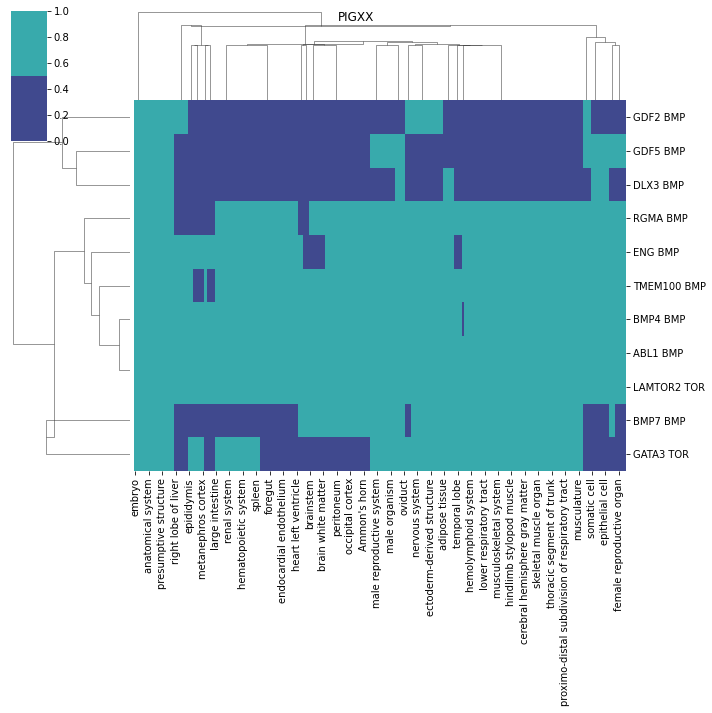

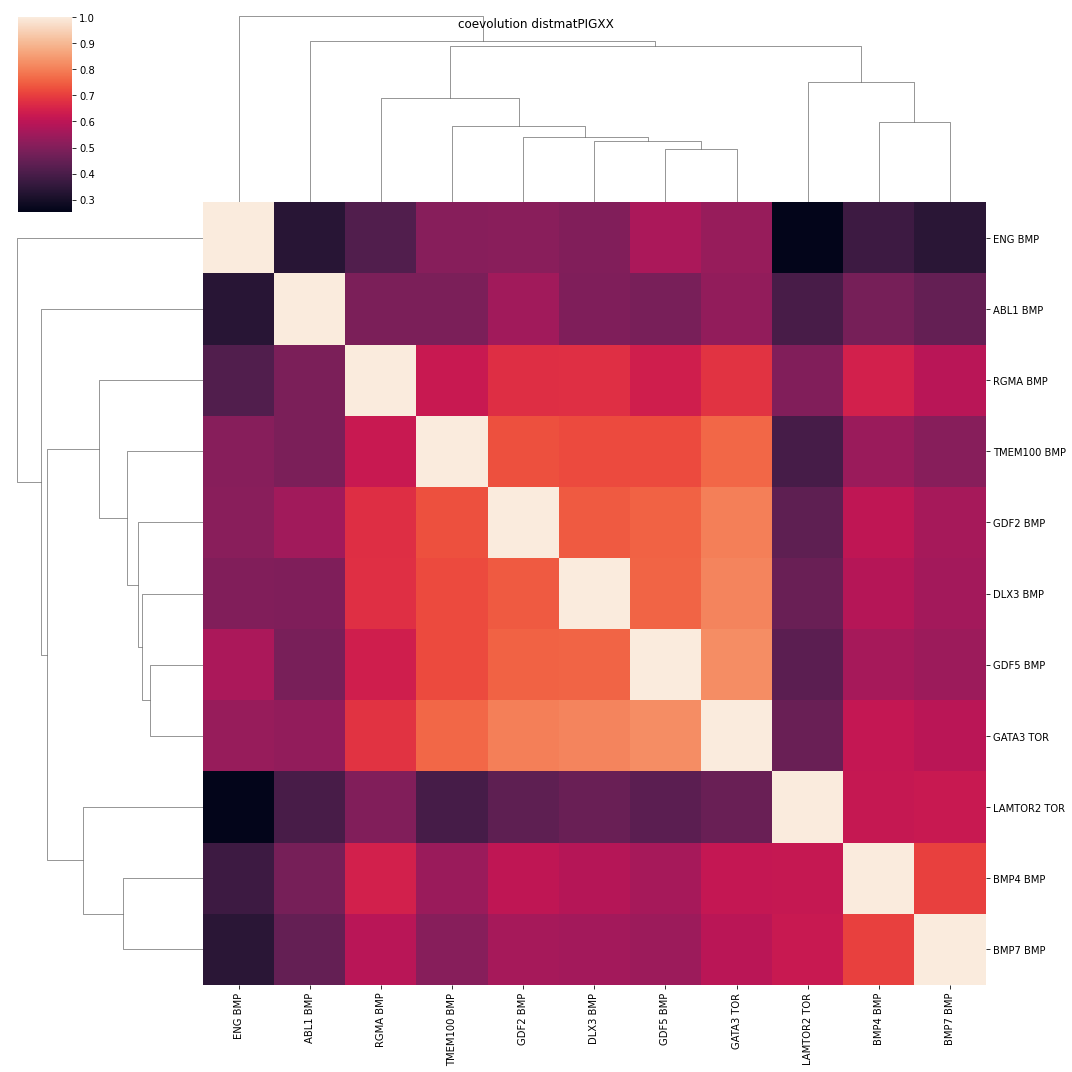

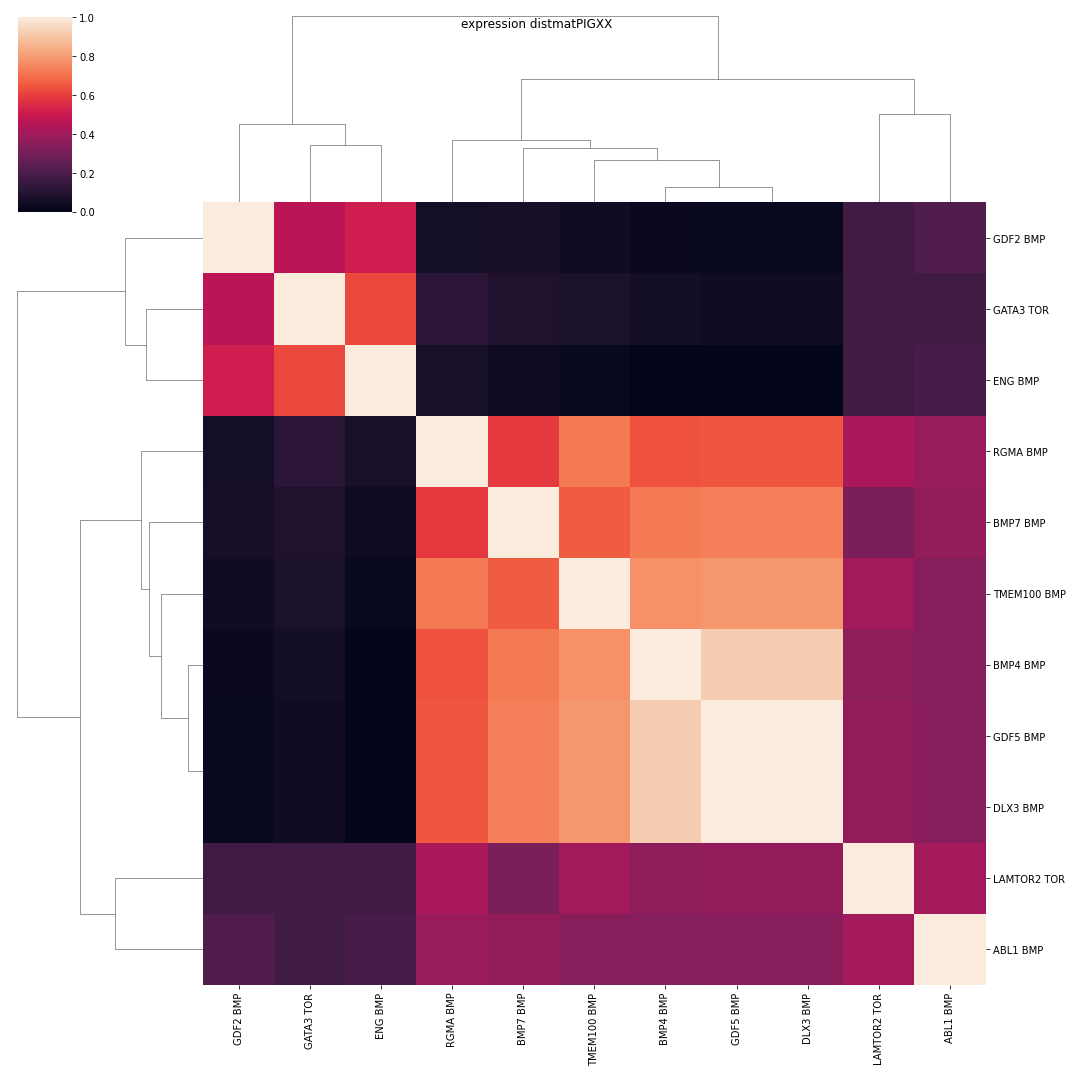

 do our matrices match from one approach to the other? 


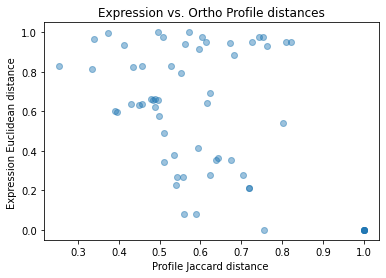

Pearson:PearsonRResult(statistic=0.46992613734161703, pvalue=5.388382254719099e-08)


In [28]:
#now for the results of our efforts!
from scipy.stats import pearsonr , spearmanr


expression_mats = {}
expression_rowmappers = {}

for spec in expressionDF.species.unique():
    selected = set()
    #look at the clustering of the expression data for each species
    print(spec)
    sub = expressionDF[expressionDF.species == spec]
    #we can create another dataframe which shows the genes expressed in each tissue
    print(sub.head())
    #each row is a gene
    #each column is a tissue
    #we only consider tissues where at least one of the genes is expressed
    rows = list(sub.names.unique())
    columns = list(sub.anatName.unique())
    expr_mat = {r :{ c : 0 for c in columns  } for r in rows }
    #lets set all of the places where each gene is expressed to 1
    for i,r in sub.iterrows():
        selected.add(r.names)
        expr_mat[r.names][r.anatName] = 1
    
    selected = list(selected)
    #and transform everything into a dataframe
    expr_mat = pd.DataFrame.from_dict( expr_mat , orient='index' )
    
    #generate a clustered heatmap figure
    #to show similarity in expression patterns across tissues
    try:
        g = sns.clustermap( expr_mat , metric= metrics[0] , method=methods[2] , col_cluster=True, row_cluster= True , cmap = sns.color_palette("mako", 2))
        g.fig.suptitle(spec)
        g.savefig( spec+'expcluster.svg')
        plt.show()

        #comparing the phylogenetic profile distmat
        sub_orthodf = orthosdf.loc[selected]
        distmat_ortho = cdist(sub_orthodf.to_numpy(), sub_orthodf.to_numpy() , metric = metrics[2])
        g = sns.clustermap( 1-distmat_ortho , metric= metrics[0] , method=methods[1] , rasterized=True, col_cluster=True, row_cluster= True, yticklabels = selected , xticklabels = selected , figsize = (15, 15)  )
        g.fig.suptitle( 'coevolution distmat' + spec) 
        plt.show()

        #with the expression profile distmat
        distmat_expr = cdist(expr_mat.to_numpy(), expr_mat.to_numpy() , metric = metrics[0])
        #scale the distmat
        distmat_expr /= np.amax(distmat_expr)

        g = sns.clustermap( 1-distmat_expr , metric= metrics[0] , method=methods[1] , col_cluster=True,rasterized=True,  row_cluster= True, yticklabels = selected, xticklabels =selected , figsize = (15, 15) )
        g.fig.suptitle( 'expression distmat' + spec ) 
        plt.show()

        expression_mats[spec] = distmat_expr
        expression_rowmappers[spec] = selected

        #verify if expression and phylogenetic profile distances are correlated.
        print( ' do our matrices match from one approach to the other? ')
        plt.title( 'Expression vs. Ortho Profile distances')
        plt.xlabel( 'Profile Jaccard distance ')
        plt.ylabel( 'Expression Euclidean distance ')
        plt.scatter(1-distmat_ortho.ravel() , distmat_expr.ravel() , alpha= .25)
        plt.show()
        print( 'Pearson:'+ str( pearsonr( 1-distmat_ortho.ravel() , 1-distmat_expr.ravel() )  ) ) 
    except:
        pass

In [29]:
#pretty good matches in the cases where there is good resolution in the tissues
#It looks like there is coevolution and coexpression signal within each network
#now we can compare the networks generated with each approach to string.
#mtor and bmp are well studied pathways so they should have experimental
#and literature evidence in their String data

In [30]:
#her are some function adapted from the string api reference https://string-db.org/help/api/
#we can map to string identifiers and pull down pairwise interactions for our genes across species

import requests
from time import sleep
from io import StringIO

string_api_url = "https://version-11-5.string-db.org/api"
def map2string(my_genes, species):
    output_format = "tsv-no-header"
    method = "get_string_ids"

    params = {
        "identifiers" : "\r".join(my_genes), # your protein list
        "species" : species , # species NCBI identifier 
        "limit" : 1, # only one (best) identifier per input protein
        "echo_query" : 1, # see your input identifiers in the output
        "caller_identity" :  "OMA profiling ipython notebook"  # your app name
    }
    request_url = "/".join([string_api_url, output_format, method])
    results = requests.post(request_url, data=params)
    mapper = {}
    for line in results.text.strip().split("\n"):
        l = line.split("\t")
        input_identifier, string_identifier = l[0], l[2]
        #print("Input:", input_identifier, "STRING:", string_identifier, sep="\t")
        mapper[string_identifier]= input_identifier
    return mapper

def get_string_net(my_genes , species, output_format = 'tsv'):
    sleep(1)
    method = "network"    
    request_url = "/".join([string_api_url, output_format, method])
    params = {
        "identifiers" : "%0d".join(my_genes), # your protein
        "species" : species, # species NCBI identifier 

        "caller_identity" : "OMA profiling ipython notebook" # your app name
    }
    response = requests.post(request_url, data=params).text
    return pd.read_table(StringIO(response))


In [31]:
import networkx as nx

#Lets zoom in on the TOR pathway for this final step and compare our coexpression and coevolution
#graphs to the interactions found in databases, interaction experiments and the literature


HUMAN {'ZEP1_HUMAN': 'ENSG00000095951', 'RUNX2_HUMAN': 'ENSG00000124813', 'RGMB_HUMAN': 'ENSG00000174136', 'ABL1_HUMAN': 'ENSG00000097007', 'BMP4_HUMAN': 'ENSG00000125378', 'MSX2_HUMAN': 'ENSG00000120149', 'TGFB2_HUMAN': 'ENSG00000092969', 'BMP5_HUMAN': 'ENSG00000112175', 'GDF2_HUMAN': 'ENSG00000263761', 'ETV2_HUMAN': 'ENSG00000105672', 'TM100_HUMAN': 'ENSG00000166292', 'FKBP8_HUMAN': 'ENSG00000105701', 'RGMA_HUMAN': 'ENSG00000182175', 'DLX3_HUMAN': 'ENSG00000064195', 'HES5_HUMAN': 'ENSG00000197921', 'EGLN_HUMAN': 'ENSG00000106991', 'TWSG1_HUMAN': 'ENSG00000128791', 'SMAD2_HUMAN': 'ENSG00000175387', 'BMP7_HUMAN': 'ENSG00000101144', 'GDF5_HUMAN': 'ENSG00000125965', 'CL16A_HUMAN': 'ENSG00000038532', 'MEAK7_HUMAN': 'ENSG00000140950', 'RPTOR_HUMAN': 'ENSG00000141564', 'LTOR2_HUMAN': 'ENSG00000116586', 'GATA3_HUMAN': 'ENSG00000107485', 'SIN1_HUMAN': 'ENSG00000119487', 'LTOR5_HUMAN': 'ENSG00000134248', 'MFSD8_HUMAN': 'ENSG00000164073', 'AKT1_HUMAN': 'ENSG00000142208', 'LST8_HUMAN': 'ENSG0000

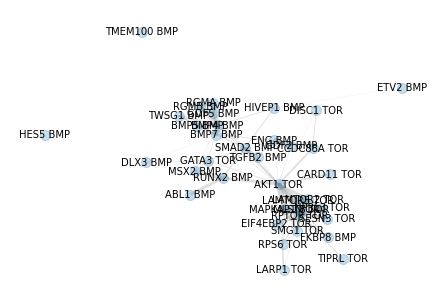

DROME {'P27091': 'FBgn0024234', 'Q7K3D4': 'FBgn0034368', 'D3PFG0': 'FBgn0003865', 'Q9W494': 'FBgn0000394', 'O96660': 'FBgn0025800', 'Q9VEV4': 'FBgn0038427', 'Q9W437': 'FBgn0029840', 'Q9V8I2': 'FBgn0034350', 'Q9V719': 'FBgn0033935', 'Q9VS51': 'FBgn0035767', 'B4F5L6': 'FBgn0264691', 'X2JDZ8': 'FBgn0263968', 'B6IDY8': 'FBgn0036397', 'Q9XZ56': 'FBgn0261560', 'P29327': 'FBgn0261592', 'Q9W5W6': 'FBgn0031094'}
Graph with 12 nodes and 23 edges


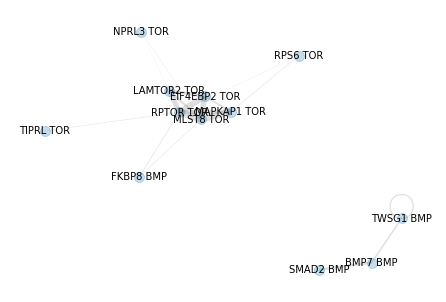

CAEEL {'G5EDE5': 'WBGene00022154', 'Q22033': 'WBGene00011283', 'P45896': 'WBGene00004857', 'Q95UF8': 'WBGene00001660', 'Q9N2U6': 'WBGene00022402', 'Q19845': 'WBGene00017861', 'Q9N3G2': 'WBGene00021814', 'P91040': 'WBGene00015697', 'X5LXA9': 'WBGene00018072', 'Q9NEN6': 'WBGene00004475', 'Q9N4D6': 'WBGene00022279', 'P34274': 'WBGene00022803'}
Graph with 5 nodes and 3 edges


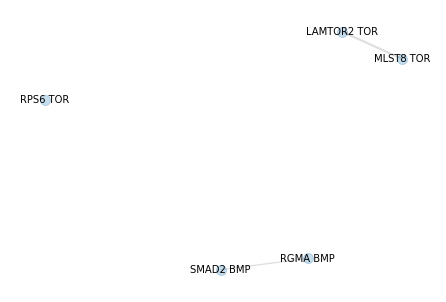

DANRE {'Q6U1J3': 'ENSDARG00000040261', 'Q6IYD1': 'ENSDARG00000079323', 'F8W5Q8': 'ENSDARG00000035187', 'O57574': 'ENSDARG00000019995', 'A0A0J9YJ71': 'ENSDARG00000104651', 'Q7SZV4': 'ENSDARG00000027087', 'F1QWZ4': 'ENSDARG00000059173', 'Q6P3J6': 'ENSDARG00000001734', 'A0A2R8QKU5': 'ENSDARG00000012248', 'Q6DBS2': 'ENSDARG00000014626', 'B2GR89': 'ENSDARG00000104244', 'F1Q5P5': 'ENSDARG00000006389', 'Q08CJ5': 'ENSDARG00000063230', 'F1QK08': 'ENSDARG00000002760', 'X1WGI7': 'ENSDARG00000038094', 'Q1LWV7': 'ENSDARG00000062951', 'F1R3H0': 'ENSDARG00000039872', 'B3DGG5': 'ENSDARG00000016526', 'E9QIJ2': 'ENSDARG00000091777', 'E7FA90': 'ENSDARG00000090194', 'Q0VA82': 'ENSDARG00000103235', 'A0A0R4IPN3': 'ENSDARG00000003167', 'Q6ZM11': 'ENSDARG00000010918', 'Q6NYL2': 'ENSDARG00000031819', 'Q6DHL6': 'ENSDARG00000019778', 'Q7ZVJ7': 'ENSDARG00000015822', 'X1WGE1': 'ENSDARG00000052741', 'Q6PFK5': 'ENSDARG00000032353'}
Graph with 12 nodes and 14 edges


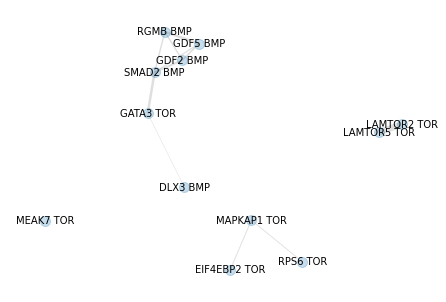

MOUSE {'A0A1Y7VJI1': 'ENSMUSG00000021366', 'A0A338P6J3': 'ENSMUSG00000048027', 'P00520': 'ENSMUSG00000026842', 'P21275': 'ENSMUSG00000021835', 'G3DRA8': 'ENSMUSG00000021469', 'P27090': 'ENSMUSG00000039239', 'Q496P8': 'ENSMUSG00000032179', 'Q9WV56': 'ENSMUSG00000072625', 'P41163': 'ENSMUSG00000006311', 'Q9CQG9': 'ENSMUSG00000069763', 'D3Z597': 'ENSMUSG00000019428', 'Q6PCX7': 'ENSMUSG00000070509', 'Q64205': 'ENSMUSG00000001510', 'Q499J8': 'ENSMUSG00000048001', 'Q63961': 'ENSMUSG00000026814', 'Q9EP52': 'ENSMUSG00000024098', 'Q62432': 'ENSMUSG00000024563', 'P23359': 'ENSMUSG00000008999', 'P43027': 'ENSMUSG00000038259', 'Q80U30': 'ENSMUSG00000068663', 'A0A1D5RMA2': 'ENSMUSG00000034105', 'A4FUW1': 'ENSMUSG00000025583', 'Q9JHS3': 'ENSMUSG00000028062', 'F6QTY0': 'ENSMUSG00000015619', 'A0A0A6YW60': 'ENSMUSG00000038696', 'A0A0N4SUV8': 'ENSMUSG00000025759', 'D3YXX3': 'ENSMUSG00000001729', 'Q9DCJ1': 'ENSMUSG00000024142', 'Q8BKX6': 'ENSMUSG00000030655', 'Q8VIJ8': 'ENSMUSG00000020289', 'Q3UZD4': 'EN

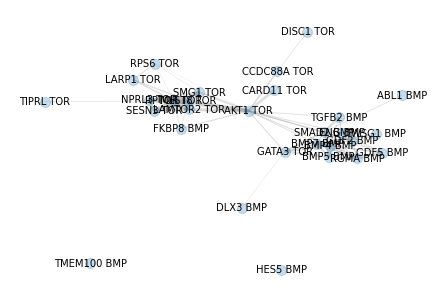

PIGXX {'F1S0X4': 'ENSSSCG00000005706', 'A0A4X1WD52': 'ENSSSCG00000005045', 'A0A4X1VFX4': 'ENSSSCG00000010375', 'A0A4X1VDB2': 'ENSSSCG00000017607', 'F1SA76': 'ENSSSCG00000002267', 'F1RSH8': 'ENSSSCG00000017589', 'K7GQF2': 'ENSSSCG00000005625', 'A5GFN2': 'ENSSSCG00000007501', 'F1S4W8': 'ENSSSCG00000023261', 'F2Z518': 'ENSSSCG00000006499', 'F1RUM8': 'ENSSSCG00000011125', 'I3LF09': 'ENSSSCG00000024955'}
Graph with 6 nodes and 7 edges


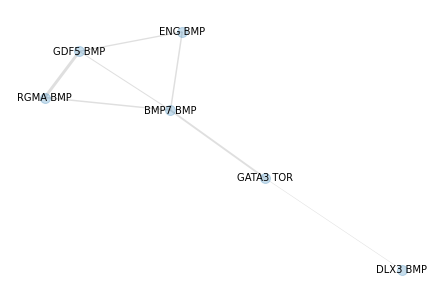

In [32]:
#next get interaction net from string for each species so we can compare with our profile based net
string_graphs = {}
for spec in qlists:
    print(spec, qlists[spec])
    #get string IDs for each protein
    mapper = map2string(qlists[spec], taxmap[spec] )
    rowmapper = {ID:i for i,ID in enumerate(mapper)}
    #make the string net using experimental evidence
    netdf = get_string_net(qlists[spec], taxmap[spec])
    netdf['x'] = netdf.stringId_A.map(rowmapper)
    netdf['y'] = netdf.stringId_B.map(rowmapper)
    netdf['Uniprot_A'] = netdf.stringId_A.map(mapper)
    netdf['Uniprot_B'] = netdf.stringId_B.map(mapper)
    netdf['name_A'] = netdf.Uniprot_A.map(names)
    netdf['name_B'] = netdf.Uniprot_B.map(names)
    
    
    #lets grab a network for each of our species of interest based on experimental data
    #we can remove the phylogenetic co-occurence channel from the evidence for a more independent verification
    #we can add the other evidence channels
    netdf['graphscore'] = ( netdf.ascore + netdf.escore + netdf.dscore ) / 3
    #transform the string net to networkx
    G = nx.Graph()
    [ G.add_edge( row.name_A , row.name_B  , weight=row.graphscore , key = 'string' ) for idx,row in netdf.iterrows() ]
    
    print(G)
    weights = np.asarray([e[2]['weight'] for e in G.edges(data = True)])
    weights/=3
    #max weight is 3 but we're scaling things from 0 to 1 to compare with our phylogenetic profiles
    pos = nx.spring_layout( G , weight='weight')
    
    nx.draw(G, pos=pos, edge_color='grey', width= 30*weights , node_size= 100 ,alpha = .25 ) 
    labels=nx.draw_networkx_labels(G , pos = pos , font_size= 10 )
    plt.show()
    string_graphs[spec] = G

orthograph
HUMAN
['GATA3 TOR', 'AKT1 TOR', 'LAMTOR5 TOR', 'MLST8 TOR', 'NPRL3 TOR', 'RPTOR TOR', 'LAMTOR2 TOR', 'MAPKAP1 TOR', 'SESN3 TOR', 'EIF4EBP2 TOR', 'RPS6 TOR', 'SMG1 TOR', 'TIPRL TOR', 'LARP1 TOR', 'CCDC88A TOR', 'DISC1 TOR', 'CARD11 TOR']
44


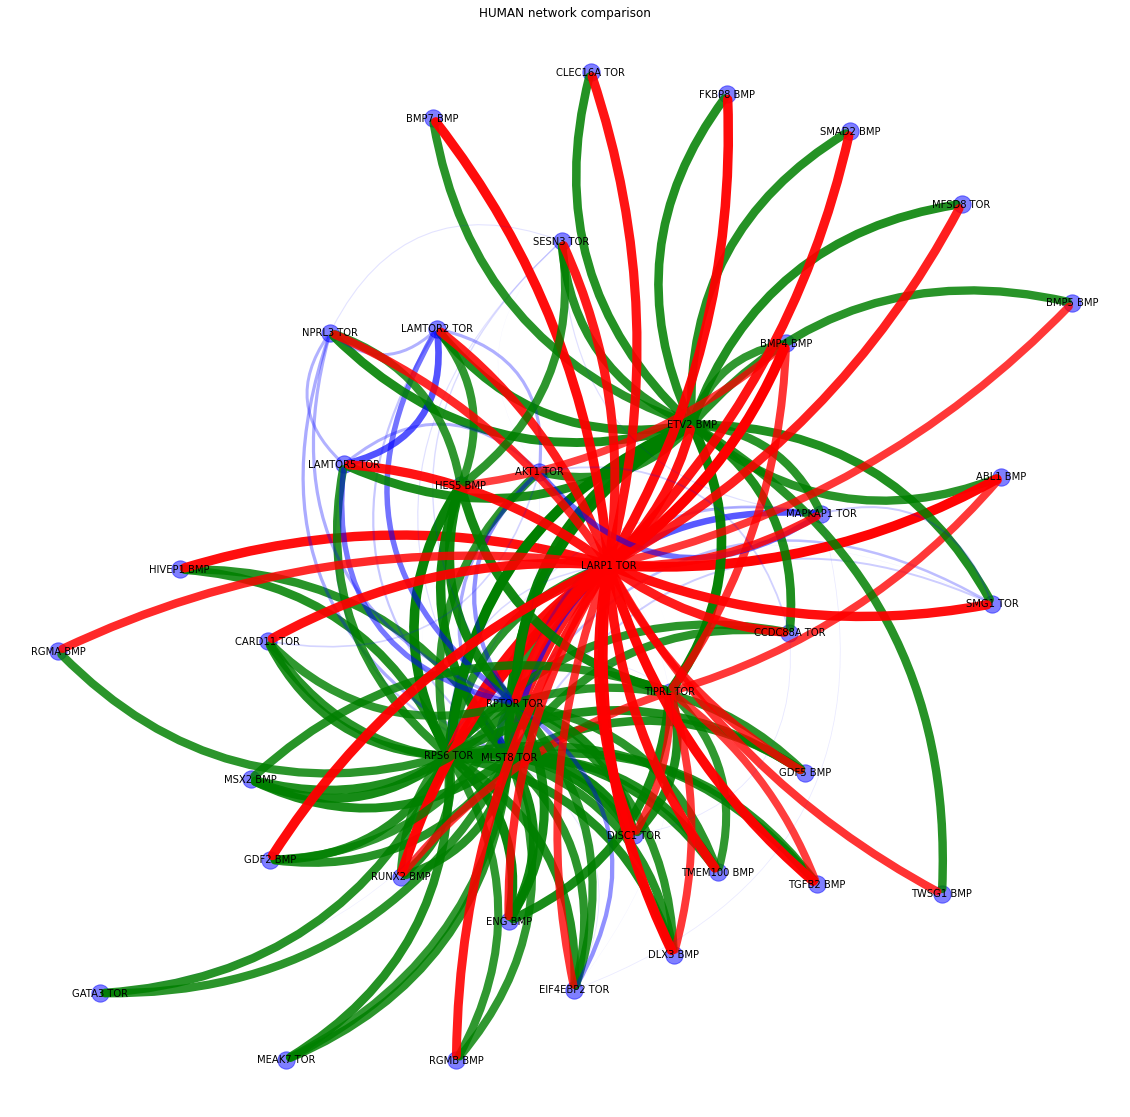

DROME
['TIPRL TOR', 'RPTOR TOR', 'RPS6 TOR', 'MAPKAP1 TOR', 'MLST8 TOR', 'EIF4EBP2 TOR', 'LAMTOR2 TOR', 'NPRL3 TOR']
17


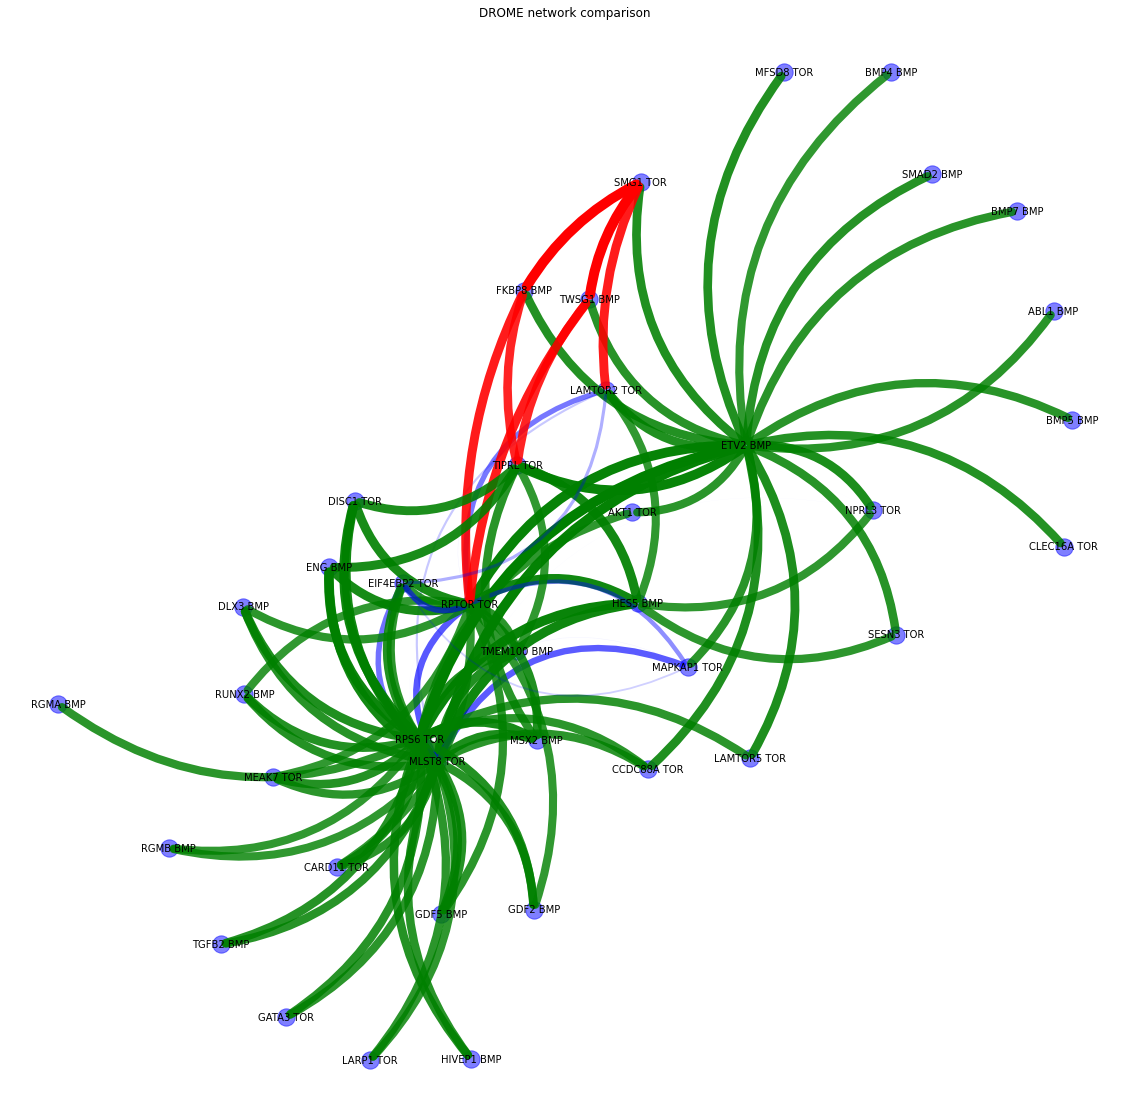

CAEEL
['MLST8 TOR', 'LAMTOR2 TOR', 'RPS6 TOR']
2


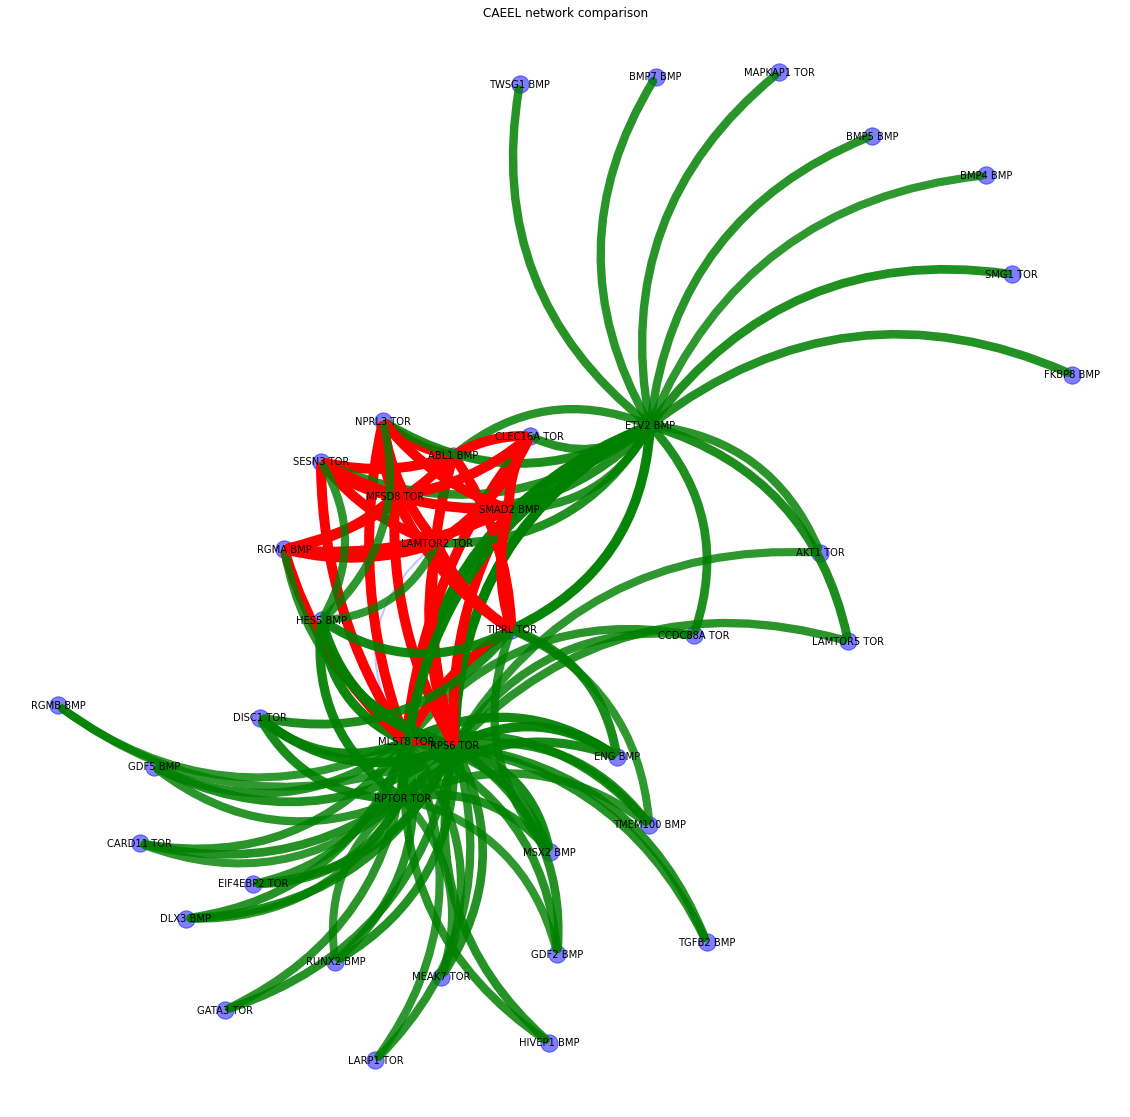

DANRE
['RPS6 TOR', 'MAPKAP1 TOR', 'EIF4EBP2 TOR', 'GATA3 TOR', 'LAMTOR2 TOR', 'LAMTOR5 TOR', 'MEAK7 TOR']
6


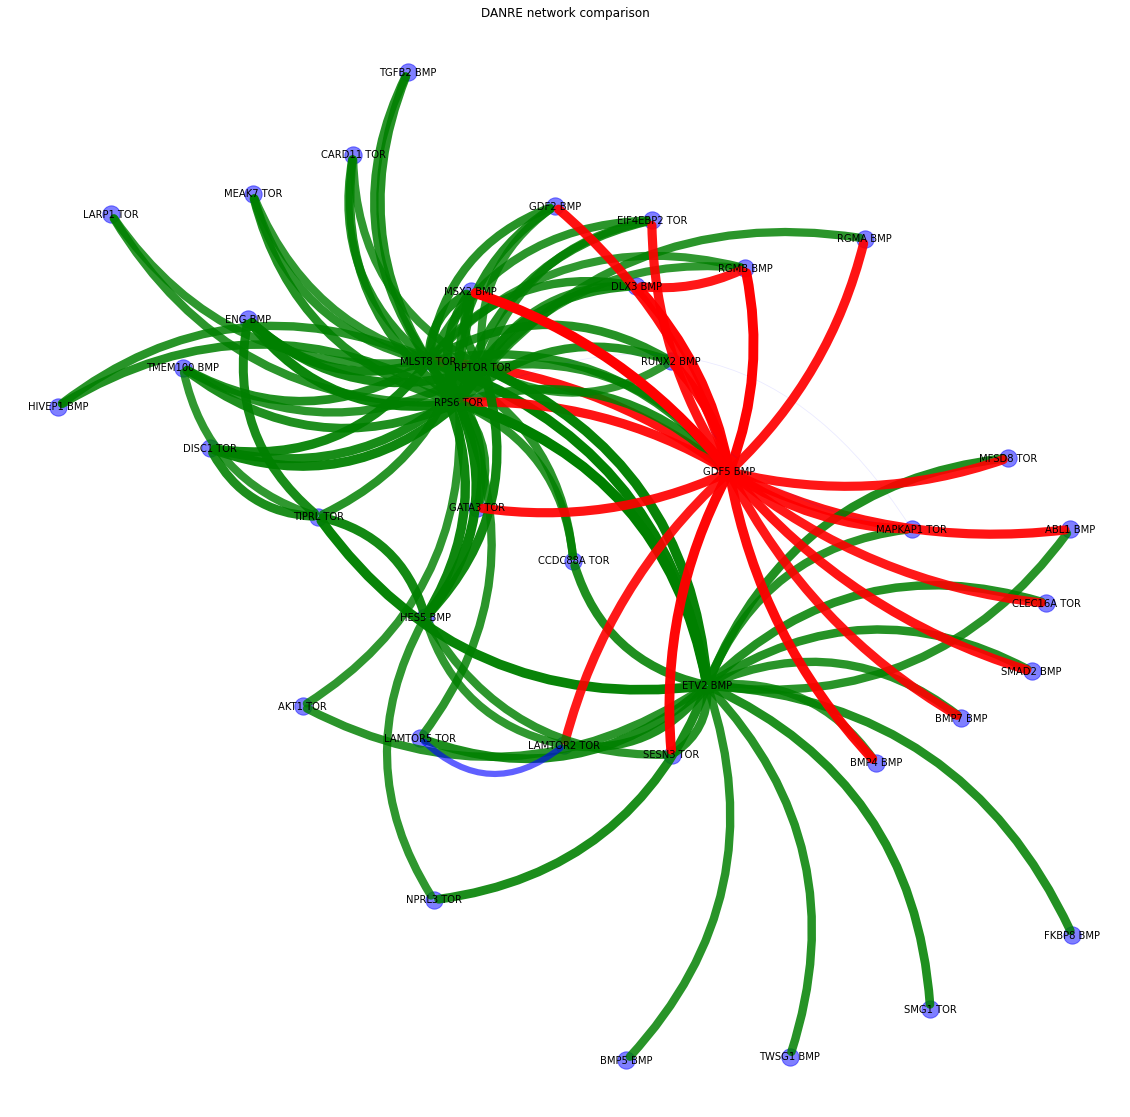

MOUSE
['AKT1 TOR', 'SESN3 TOR', 'GATA3 TOR', 'SMG1 TOR', 'DISC1 TOR', 'RPS6 TOR', 'LAMTOR2 TOR', 'CARD11 TOR', 'CCDC88A TOR', 'MLST8 TOR', 'RPTOR TOR', 'NPRL3 TOR', 'TIPRL TOR', 'LARP1 TOR']
32


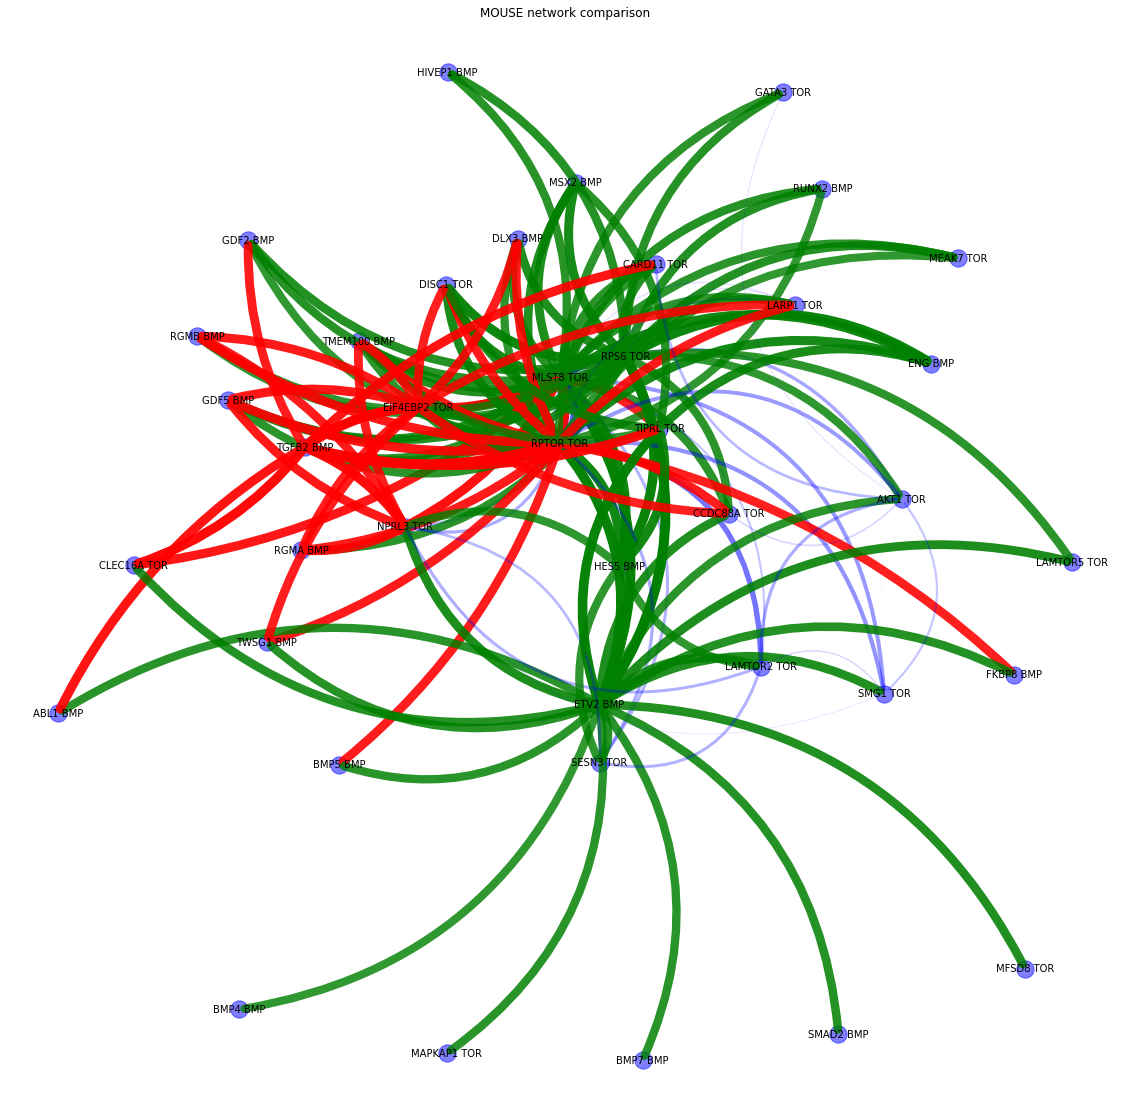

PIGXX
['GATA3 TOR']
0


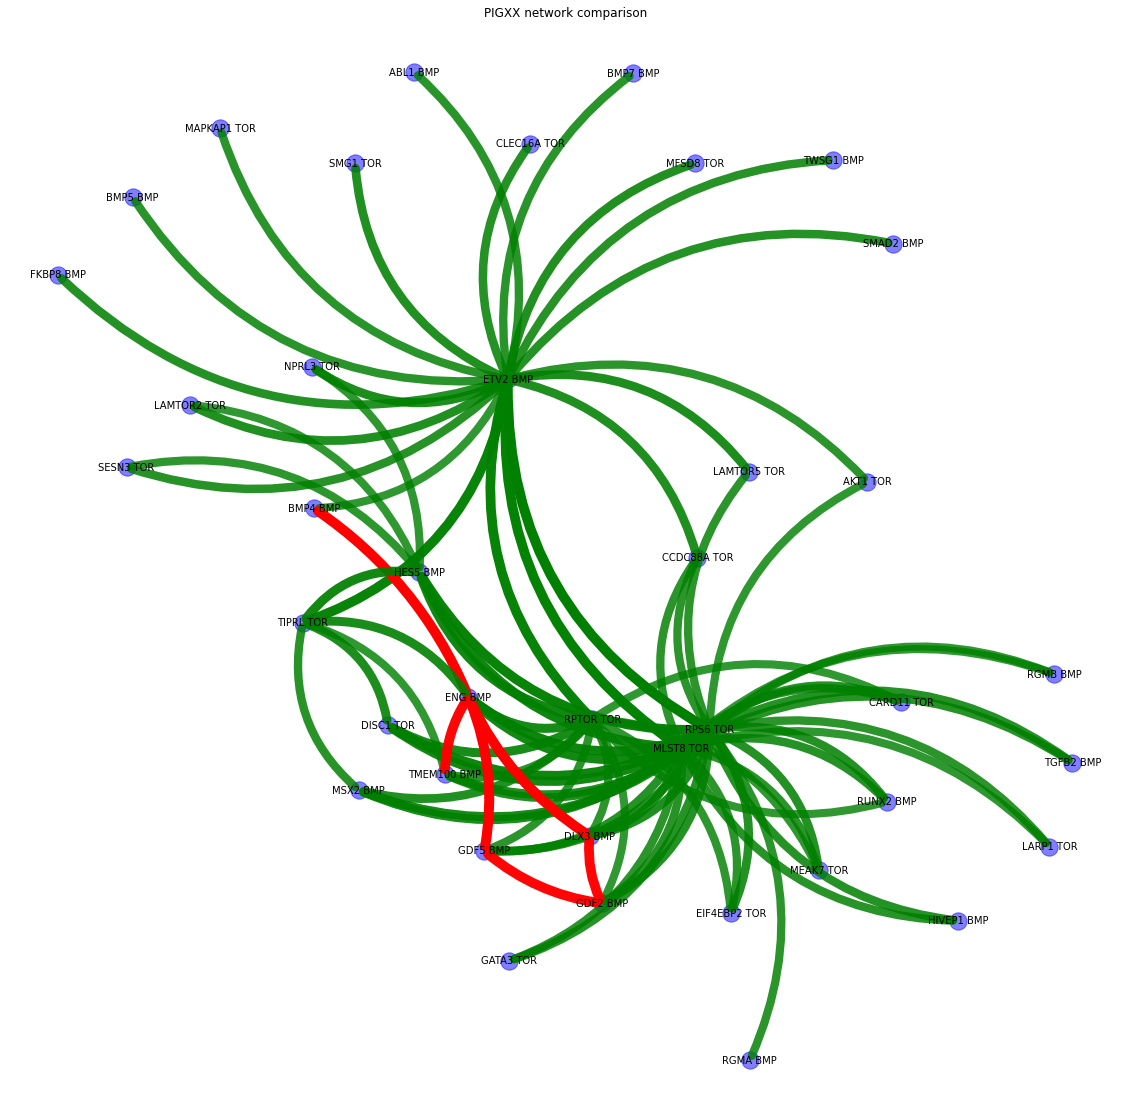

In [51]:
#now lets compare the overlap between the graphs
#each method will get its own color. 
#hopefully we see some agreement between all 3
#the phylogenetic profile wont change between species
#the other 2 will change
from matplotlib.pyplot import figure


colors = {'expre': 'r', 'ortho':'g', 'string':'b'}
curve = {'expre': 0.5, 'ortho':1, 'string':1.5}


print('orthograph')
#let's start by selecting our tor pathway genes and making an interation graph
#based on their jaccard scores
select = orthosdf.index.map( lambda x : 'TOR' in x )
tor_orthodf = orthosdf#[select]
distmat_ortho = cdist(tor_orthodf.to_numpy(), tor_orthodf.to_numpy() , metric = metrics[2])
distmat_ortho /= np.amax(distmat_ortho)

#thresh to the top quartile
distmat_ortho[ distmat_ortho < np.percentile(distmat_ortho, 90)] = 0
pandas_adj = pd.DataFrame(distmat_ortho)
pandas_adj.index = tor_orthodf.index
pandas_adj.columns = tor_orthodf.index
ortho_graph = nx.from_pandas_adjacency(pandas_adj)
weights = {  e:{ 'key':'ortho', 'weight':pandas_adj[e[0]][e[1]]} for e in ortho_graph.edges }
nx.set_edge_attributes(ortho_graph,  weights)

for spec in qlists:

    print(spec)
    #we can show all the graphs simultaneously in a multigraph
    G=nx.MultiGraph()
    
    #add phylo profiling graph
    G.add_edges_from(ortho_graph.edges(data=True))    
    #add string graph
    String_graph = string_graphs[spec]
    print(String_graph.nodes)
    exclude = [ n for n in String_graph.nodes if 'TOR' not in n ]
    #String_graph.remove_nodes_from(exclude)
    print(len(String_graph.edges))
    G.add_edges_from( String_graph.edges(data = True ) )
    # and finally add the expression graph
    expr_mat = expression_mats[spec]
    expr_mat[ expr_mat < np.percentile( expr_mat , 90)] = 0 
    pandas_adj = pd.DataFrame(expression_mats[spec])
    pandas_adj.index = expression_rowmappers[spec]
    pandas_adj.columns = expression_rowmappers[spec]
    select = [ n for n in pandas_adj.index if 'TOR' not in n]
    #pandas_adj= pandas_adj.drop(select , axis = 0 )
    #pandas_adj= pandas_adj.drop(select , axis = 1 )
    expression_graph = nx.from_pandas_adjacency(pandas_adj)
    weights = {  e:{ 'key':'expre' , 'weight':pandas_adj[e[0]][e[1]] } for e in expression_graph.edges }
    nx.set_edge_attributes(expression_graph,  weights)
    
    G.add_edges_from(expression_graph.edges(data = True))
    pos = nx.spring_layout( G , weight='weight')

    f = plt.figure()
    f.set_figwidth(20)
    f.set_figheight(20)
    plt.plot()

    #plot the whole mess
    nx.draw_networkx_nodes(G, pos, node_color = 'b', node_size = 300, alpha = .5)
    ax = plt.gca()
    
    for e in G.edges(data = True):
        ax.annotate("",
                    xy=pos[e[0]], xycoords='data',
                    xytext=pos[e[1]], textcoords='data',
                    arrowprops=dict(arrowstyle="-", color=colors[e[2]['key']],
                                    shrinkA=5, shrinkB=5, lw = 10*e[2]['weight'],
                                    patchA=None, patchB=None, alpha = e[2]['weight'],
                                    connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*curve[e[2]['key']])
                                    ),
                                    ),
                    )
    labels=nx.draw_networkx_labels(G , pos = pos , font_size= 10 )
    
    plt.axis('off')
    plt.title(spec + ' network comparison')
    plt.show()